In [108]:
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import sys
sys.path.append("..")

%matplotlib inline
#plt.style.use('physics')

plt.rcParams['axes.grid'       ]  = False
plt.rcParams['xtick.labelsize' ]  = 14
plt.rcParams['ytick.labelsize' ]  = 14
plt.rcParams['axes.labelsize'  ]  = 14
plt.rcParams['legend.fancybox' ]  = False

pd.options.mode.chained_assignment = None

In [109]:
data_raw = pd.read_hdf('h4g_train.h5')

In [139]:
data_raw.head()

CTStarCS  CT_a1Pho1  CT_a2Pho1  a1_Pt/tp_mass  a2_Pt/tp_mass  \
0  0.165116   0.630393   0.317841       0.352719       0.171331   
1  0.112902   0.207720   0.467335       0.208223       0.130878   
2  0.027279   0.082218   0.785880       0.207714       0.139279   
3  0.139224   0.721829   0.160873       0.960053       0.208311   
4  0.528311   0.368346   0.750647       0.262072       0.046202   

   a1_Pt/a1_mass  a2_Pt/a2_mass  a1_a2_DR  a1_Pho1PtOvera1Mass  \
0       1.069287       0.523739  2.510870             0.781682   
1       0.434435       0.271643  1.871586             0.538157   
2       0.439450       0.287501  1.952182             0.735216   
3       2.035178       0.436756  1.053139             1.580997   
4       0.543478       0.096577  2.161924             0.538121   

   a1_Pho2PtOvera1Mass  ...    Y    Z  m_sideband  cr_region  ish4g  eta_cat  \
0             0.339056  ...  0.0  0.0       False         PP   True     EBEB   
1             0.483513  ...  0.0  0.0       False         PP   True     EBEB   
2             0.355458  ...  0.0  0.0       False         PP   True     EBEB   
3             0.454182  ...  0.0  0.0       False         PP   True     EBEB   
4             0.537748  ...  0.0  0.0       False         PP   True     EEEB   

   lead_eta_cat  subl_eta_cat     avg_et    diff_et  
0            EB            EB  28.316309   0.298115  
1            EB            EB  23.344471  10.497210  
2            EB            EB  18.649887   5.186209  
3            EB            EB  35.399776  17.523779  
4            EE            EB  20.701183   5.780268  

[5 rows x 58 columns]

In [110]:
# data_all = data_raw[(data_raw.pho3_electronveto == 1   ) & 
#                     (data_raw.pho4_electronveto    == 1   ) ] 
data_all = data_raw 

print len(data_all)


137676


In [111]:
data_all['m_sideband'] = np.abs(data_all.tp_mass - 125 ) > 10


In [112]:
# data_all['cr_region'] = np.chararray(data_all.shape[0], itemsize=4)
# data_all.loc[(data_all.min_id>-0.75), 'cr_region'] = 'PP'
# data_all.loc[(data_all.max_id<-0.75), 'cr_region'] = 'FF'
# data_all.loc[(data_all.pho1_MVA >-0.75) & (data_all.pho2_MVA <-0.75), 'cr_region'] = 'PF'
# data_all.loc[(data_all.pho2_MVA >-0.75) & (data_all.pho1_MVA    <-0.75), 'cr_region'] = 'FP'

In [113]:
data_all['cr_region'] = np.chararray(data_all.shape[0], itemsize=4)
data_all.loc[(data_all.pho1_MVA>-0.9) & (data_all.pho2_MVA > -0.9) & (data_all.pho3_MVA>-0.75) & (data_all.pho4_MVA > -0.75), 'cr_region'] = 'PP'
data_all.loc[(data_all.pho1_MVA>-0.9) & (data_all.pho2_MVA > -0.9) & (data_all.pho3_MVA<-0.9) & (data_all.pho4_MVA < -0.9), 'cr_region'] = 'FF'
data_all.loc[(data_all.pho1_MVA>-0.9) & (data_all.pho2_MVA > -0.9) & (data_all.pho3_MVA >-0.75) & (data_all.pho4_MVA <-0.9), 'cr_region'] = 'PF'
data_all.loc[(data_all.pho1_MVA>-0.9) & (data_all.pho2_MVA > -0.9) & (data_all.pho3_MVA <-0.9) & (data_all.pho4_MVA >-0.75), 'cr_region'] = 'FP'

In [114]:
# def h4g_presel(data):
#     return (
#         (data["tp_mass"         ]> 110    )&
#         (data["tp_mass"         ]< 180    )&
#         (data["pho1_pt"         ] > 30    )&
#         (data["pho2_pt"         ] > 18    )&
#         (data["pho3_pt"         ] > 15    )&
#         (data["pho4_pt"         ] > 15    )
#     )

# data_all['ish4g'] = h4g_presel(data_all)
# data_all['ish4g'] = h4g_presel(data_all)

def h4g_presel(data):
    return (
        (data["tp_mass"         ]> 110    )&
        (data["tp_mass"         ]< 180    )&
        (data["pho1_pt"         ]> 30     )&
        (data["pho2_pt"         ]> 18     )
#         (data["pho3_pt"         ]> 15     )&
#         (data["pho4_pt"         ]> 15     )&
#         (data["pho1_electronveto"  ] ==1   )&
#         (data["pho2_electronveto"  ] ==1   )&
#         (data["pho3_electronveto"  ] ==1   )&
#         (data["pho4_electronveto"  ] ==1   )
    )

data_all['ish4g'] = h4g_presel(data_all)
data_all['ish4g'] = h4g_presel(data_all)

In [115]:
data_all['eta_cat'] = np.chararray(data_all.shape[0], itemsize=4)

data_all.loc[((np.abs(data_all.pho3_eta   )>=0)&(np.abs(data_all.pho3_eta   )<1.5) & 
              (np.abs(data_all.pho4_eta)>=0)&(np.abs(data_all.pho4_eta)<1.5)), 'eta_cat']  = 'EBEB'

data_all.loc[((np.abs(data_all.pho3_eta   )>=0)&(np.abs(data_all.pho3_eta   )<1.5) & 
              (np.abs(data_all.pho4_eta)>=1.5)&(np.abs(data_all.pho4_eta)<=3)), 'eta_cat'] = 'EBEE'

data_all.loc[((np.abs(data_all.pho3_eta   )>=1.5)&(np.abs(data_all.pho3_eta   )<=3) & 
              (np.abs(data_all.pho4_eta)>=0)&(np.abs(data_all.pho4_eta)<1.5)), 'eta_cat']  = 'EEEB'

data_all.loc[((np.abs(data_all.pho3_eta   )>=1.5)&(np.abs(data_all.pho3_eta   )<=3) & 
              (np.abs(data_all.pho4_eta)>=1.5)&(np.abs(data_all.pho4_eta)<=3)), 'eta_cat'] = 'EEEE'

In [116]:
data_all['lead_eta_cat'] = np.chararray(data_all.shape[0], itemsize=4)
data_all['subl_eta_cat'] = np.chararray(data_all.shape[0], itemsize=4)

data_all.loc[((np.abs(data_all.pho3_eta)>=0  )&(np.abs(data_all.pho3_eta)<1.5)),'lead_eta_cat']='EB'
data_all.loc[((np.abs(data_all.pho3_eta)>=1.5)&(np.abs(data_all.pho3_eta)<= 3)),'lead_eta_cat']='EE'

data_all.loc[((np.abs(data_all.pho4_eta)>=0  )&(np.abs(data_all.pho4_eta)<1.5)),'subl_eta_cat']='EB'
data_all.loc[((np.abs(data_all.pho4_eta)>=1.5)&(np.abs(data_all.pho4_eta)<=3 )),'subl_eta_cat']='EE'

In [117]:
data_all['avg_et' ] = (data_all.pho3_pt +  data_all.pho4_pt)/2.0
data_all['diff_et'] = (data_all.pho3_pt -  data_all.pho4_pt)

In [118]:
def divide( a, b ):
    """ ignore / 0, div0( [-1, 0, 1], 0 ) -> [0, 0, 0] """
    with np.errstate(divide='ignore', invalid='ignore'):
        c = np.true_divide( a, b )
        c[ ~ np.isfinite( c )] = 0  # -inf inf NaN
        print a, b,c
    return c

In [156]:
# wbins = np.array([15,30,45,65,100,150,1000])
# wbins = np.array([15,20,25,30,35,45,50])
wbins = np.array([20,30,45,65,100,150,1000])

In [157]:
def fake_factor(data, variable, bins, region = 'FP'):
    for i in range(len(bins)-1):
        print np.array(bins[i+1])
        print "*****"
        print np.array(bins[i])
        
    xd = np.array([(bins[i+1]+ bins[i])/2.0 for i in range(len(bins)-1)])
    xe = np.array([(bins[i+1]- bins[i])/2.0 for i in range(len(bins)-1)])
    print "xd ", xd
    h_pass,_ = np.histogram(data[data.cr_region=='PP'][variable],
                            weights=data[data.cr_region=='PP'].weight, bins=bins )
    h_fail,_ = np.histogram(data[data.cr_region==region][variable],
                            weights=data[data.cr_region==region].weight, bins=bins )
    print "fake factor region:", region
    factor = divide(h_pass,h_fail)
    print "factor: ", factor
    er1 = divide(1.0,np.sqrt(h_pass))
    er2 = divide(1.0,np.sqrt(h_fail))
    ferr = factor * np.sqrt(er1**2 + er2**2)
    up = dw = ferr/2.0
    return (xd,xe,factor, dw, up)

In [158]:
def qcd_purity(data, variable, bins, region = 'PP'):
    xd = np.array([(bins[i+1]+ bins[i])/2.0 for i in range(len(bins)-1)])
    xe = np.array([(bins[i+1]- bins[i])/2.0 for i in range(len(bins)-1)])
    
    h_QCD,_ = np.histogram(data[(data.cr_region==region)&(data.Z == 0)][variable],
                            weights=data[(data.cr_region==region)&(data.Z == 0)].weight, 
                            bins=bins )
    h_EWK,_ = np.histogram(data[(data.cr_region==region)&(data.Z==1)][variable],
                            weights=data[(data.cr_region==region)&(data.Z==1)].weight, 
                            bins=bins )
    h_ALL = h_EWK + h_QCD
    factor = divide(h_QCD,h_ALL)
    er1 = divide(1.0,np.sqrt(h_QCD))
    er2 = divide(1.0,np.sqrt(h_ALL))
    ferr = factor * (1 -  factor) / h_ALL
    
    up = np.minimum(ferr/2.0,np.ones (ferr.shape[0]))
    dw = np.maximum(ferr/2.0,np.zeros(ferr.shape[0]))
    return (xd,xe,factor,dw, up)

i 0
reg EB
30
*****
20
45
*****
30
65
*****
45
xd  [25.  37.5 55. ]
fake factor region: PF
[1.7299778e+01 6.7996979e-02 1.2554169e-02] [12.353697    0.11901474  0.0300827 ] [1.4003725  0.5713324  0.41732183]
factor:  [1.4003725  0.5713324  0.41732183]
1.0 [4.1593003  0.2607623  0.11204538] [0.24042505 3.8349102  8.924954  ]
1.0 [3.5147827  0.34498513 0.17344366] [0.2845126 2.8986757 5.765561 ]
30
*****
20
45
*****
30
65
*****
45
xd  [25.  37.5 55. ]
fake factor region: FP
[19.48838     4.8357525   0.14294434] [14.880608    6.1036415   0.05702972] [1.3096495  0.79227334 2.5064883 ]
factor:  [1.3096495  0.79227334 2.5064883 ]
1.0 [4.4145646 2.1990345 0.3780798] [0.22652291 0.45474502 2.6449442 ]
1.0 [3.8575392  2.4705548  0.23880897] [0.2592326  0.40476736 4.1874475 ]
i 1
reg EE
30
*****
20
45
*****
30
65
*****
45
xd  [25.  37.5 55. ]
fake factor region: PF
[1.5807629e-01 2.6702881e-02 8.5830688e-05] [0.24763107 0.02676201 0.        ] [0.638354   0.99779063 0.        ]
factor:  [0.638354

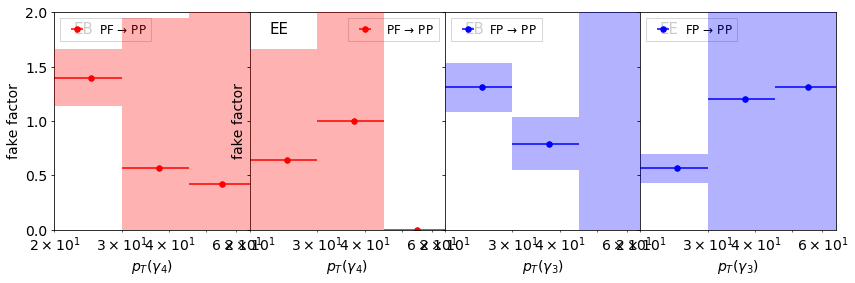

In [159]:
# wbins = np.array([10,15,30,45,60])
# wbins = np.array([10,30,40,60,100])
# wbins = np.array([15,20,25,30,35,45,50])
# wbins = np.array([10,15,20,30,45])
# wbins = np.array([10,15,20,30])
# wbins = np.array([20,30,45,65,1000])
# wbins = np.array([10,15,20])
wbins = np.array([20,30,45,65])




fig, ax = plt.subplots(1,4, sharex=True, sharey=True, figsize=(14,4))
fig.subplots_adjust(wspace=0)
for i, reg in enumerate(np.unique(data_all.lead_eta_cat)):
    print "i", i
    print "reg", reg
    x, xe,f_pf,dw_pf,up_pf = fake_factor(data_all[(data_all.Y==0)&(data_all.Z==0)&(data_all.lead_eta_cat==reg)],
                             'pho4_pt',wbins,region='PF')
    x, xe,f_fp,dw_fp,up_fp = fake_factor(data_all[(data_all.Y==0)&(data_all.Z==0)&(data_all.subl_eta_cat==reg)],
                             'pho3_pt',wbins,region='FP')
    ax[i].errorbar(x,f_pf,xerr=xe,fmt='.', markersize=11,capthick=0, alpha=1.0, color='r', label='PF $\\to$ PP')
    ax[i+2].errorbar(x,f_fp,xerr=xe,fmt='.', markersize=11,capthick=0, alpha=1.0, color='b', label='FP $\\to$ PP')
    ax[i].bar(x,2*(up_pf),bottom = f_pf - dw_pf, width= 2*xe, color='r',alpha=0.3, zorder=9, 
            align='center',edgecolor='None',lw=0.0)
    ax[i+2].bar(x,2*(up_fp),bottom = f_fp - dw_fp, width= 2*xe, color='b',alpha=0.3, zorder=9, 
            align='center',edgecolor='None',lw=0.0)
    ax[i  ].axhline(0,color='black',ls='--',lw=0.5)
    ax[i+2].axhline(0,color='black',ls='--',lw=0.5)
    ax[i].set_xscale('log')
    ax[i  ].set_xlabel('$p_{T}(\gamma_%i)$' % 4)
    ax[i+2].set_xlabel('$p_{T}(\gamma_%i)$' % 3)
    ax[i].set_xlim(np.min(wbins), np.max(wbins))
    ax[i].set_ylim(0,2 )
    ax[i].annotate(reg,xy=(0.1,0.9), fontsize=15,xycoords='axes fraction')
    ax[i+2].annotate(reg,xy=(0.1,0.9), fontsize=15,xycoords='axes fraction')
    ax[i].legend(fontsize=12)
    ax[i+2].legend(fontsize=12)
    
    ax[i].set_ylabel('fake factor')

[12.274698    0.13280106  0.02184677] [12.89275     0.17002964  0.02199507] [0.9520621  0.7810465  0.99325776]
1.0 [3.5035264  0.3644188  0.14780654] [0.2854267 2.7440956 6.7656007]
1.0 [3.5906475  0.4123465  0.14830734] [0.2785013 2.425145  6.7427545]
[13.329723    6.161022    0.02996826] [16.65068     6.7226787   0.05962086] [0.80055124 0.9164535  0.5026473 ]
1.0 [3.6509893  2.4821405  0.17311344] [0.27389836 0.40287808 5.7765594 ]
1.0 [4.0805244  2.5928128  0.24417382] [0.24506654 0.38568154 4.0954432 ]
[9.125153e+00 5.672394e+00 8.544922e-04] [15.342588    5.9750576   0.03573227] [0.59475964 0.94934547 0.02391374]
1.0 [3.0207868 2.3816788 0.0292317] [ 0.33103958  0.4198719  34.20944   ]
1.0 [3.9169617  2.4443932  0.18902981] [0.25529993 0.4090995  5.2901707 ]
[19.945707    4.5942917   0.04071426] [21.257042    4.642533    0.04071426] [0.93831056 0.9896089  1.        ]
1.0 [4.4660616  2.14343    0.20177776] [0.22391093 0.46654195 4.955948  ]
1.0 [4.610536   2.1546538  0.20177776] [0

Text(0,0.5,'QCD fraction')

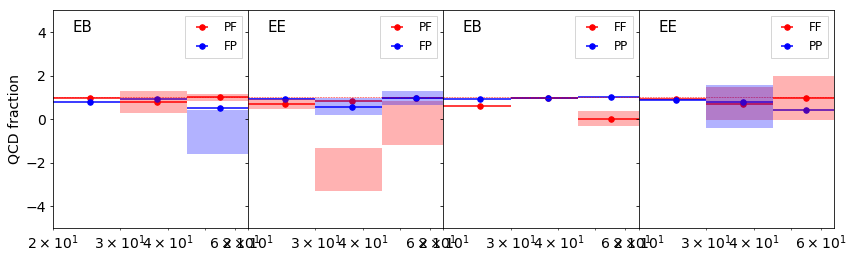

In [160]:
# wbins = np.array([10,15,30,45,65])
# wbins = np.array([15,20,25,30,35,45,50])
# wbins = np.array([10,30,40,60,100])
# wbins = np.array([10,15,20,30,45])
# wbins = np.array([0,30,45,65,1000])
# wbins = np.array([10,15,20,30,45])
# wbins = np.array([10,15,20,30])
# wbins = np.array([20,30,45,65,1000])
wbins = np.array([20,30,45,65])



fig, ax = plt.subplots(1,4, sharex=True, sharey=True, figsize=(14,4))
fig.subplots_adjust(wspace=0)
for i, reg in enumerate(np.unique(data_all.lead_eta_cat)):
    x, xe,pf,dw_pf,up_pf = qcd_purity(data_all[(data_all.Y==0)&(data_all.subl_eta_cat==reg)],'pho4_pt',wbins,region='PF')
    x, xe,fp,dw_fp,up_fp = qcd_purity(data_all[(data_all.Y==0)&(data_all.lead_eta_cat==reg)],'pho3_pt',wbins,region='FP')
    
    x, xe,ff,dw_ff,up_ff = qcd_purity(data_all[(data_all.Y==0)&(data_all.lead_eta_cat==reg)],'avg_pt',wbins,region='FF')
    x, xe,pp,dw_pp,up_pp = qcd_purity(data_all[(data_all.Y==0)&(data_all.lead_eta_cat==reg)],'avg_pt',wbins,region='PP')

    ax[i].errorbar(x,pf,xerr=xe,fmt='.', markersize=11,capthick=0, alpha=1.0, color='r', label='PF')
    ax[i].errorbar(x,fp,xerr=xe,fmt='.', markersize=11,capthick=0, alpha=1.0, color='b', label='FP')
    
    ax[i+2].errorbar(x,ff,xerr=xe,fmt='.', markersize=11,capthick=0, alpha=1.0, color='r', label='FF')
    ax[i+2].errorbar(x,pp,xerr=xe,fmt='.', markersize=11,capthick=0, alpha=1.0, color='b', label='PP')
    ax[i].bar(x,2*(up_pf),bottom = pf - dw_pf, width= 2*xe, color='r',alpha=0.3, zorder=9, 
            align='center',edgecolor='None',lw=0.0)
    ax[i].bar(x,2*(up_fp),bottom =(fp - dw_fp), width= 2*xe, color='b',alpha=0.3, zorder=9, 
            align='center',edgecolor='None',lw=0.0)
    
    ax[i+2].bar(x,2*(up_ff),bottom = ff - dw_ff, width= 2*xe, color='r',alpha=0.3, zorder=9, 
            align='center',edgecolor='None',lw=0.0)
    ax[i+2].bar(x,2*(up_pp),bottom =(pp - dw_pp), width= 2*xe, color='b',alpha=0.3, zorder=9, 
            align='center',edgecolor='None',lw=0.0)
    ax[i].axhline(1,color='red',ls='--',lw=0.5)
    ax[i+2].axhline(1,color='red',ls='--',lw=0.5)
    ax[i].set_xscale('log')
    ax[i].set_xlim(np.min(wbins), np.max(wbins))
    ax[i].set_ylim(-5, 5)
    ax[i].annotate(reg,xy=(0.1,0.9), fontsize=15,xycoords='axes fraction')
    ax[i+2].annotate(reg,xy=(0.1,0.9), fontsize=15,xycoords='axes fraction')
    ax[i].legend(fontsize=12)
    ax[i+2].legend(fontsize=12)
    
ax[0].set_ylabel('QCD fraction')

In [161]:
np.unique(data_all[(data_all.Z==0)]['sample'])

array(['data', 'gjet', 'h4g_6'], dtype=object)

In [162]:
fake_PF = {}
fake_PF['EB'] = fake_factor(data_all[(data_all['sample'] == 'gjet')&(data_all.lead_eta_cat=='EB')],
                            'pho4_pt',wbins,region='PF')[2]
fake_PF['EE'] = fake_factor(data_all[(data_all['sample'] == 'gjet')&(data_all.lead_eta_cat=='EE')],
                            'pho4_pt',wbins,region='PF')[2]
fake_PF

30
*****
20
45
*****
30
65
*****
45
xd  [25.  37.5 55. ]
fake factor region: PF
[1.7220125e+01 6.4575195e-02 1.2077332e-02] [12.35158     0.11885071  0.03007889] [1.3941638 0.5433303 0.4015219]
factor:  [1.3941638 0.5433303 0.4015219]
1.0 [4.149714   0.2541165  0.10989691] [0.24098046 3.9352028  9.099437  ]
1.0 [3.5144813  0.3447473  0.17343266] [0.28453702 2.9006753  5.7659264 ]
30
*****
20
45
*****
30
65
*****
45
xd  [25.  37.5 55. ]
fake factor region: PF
[0.1432085  0.02603388 0.        ] [0.24729347 0.02672958 0.        ] [0.57910347 0.97397244 0.        ]
factor:  [0.57910347 0.97397244 0.        ]
1.0 [0.378429   0.16135018 0.        ] [2.6425037 6.1977    0.       ]
1.0 [0.4972861  0.16349185 0.        ] [2.0109148 6.1165133 0.       ]


{'EB': array([1.3941638, 0.5433303, 0.4015219], dtype=float32),
 'EE': array([0.57910347, 0.97397244, 0.        ], dtype=float32)}

In [163]:
purity_PF = {}
purity_PF['EB'] = qcd_purity(data_all[(data_all.Y==0)&(data_all.lead_eta_cat=='EB')],
                            'pho4_pt',wbins,region='PF')[2]
purity_PF['EE'] = qcd_purity(data_all[(data_all.Y==0)&(data_all.lead_eta_cat=='EE')],
                            'pho4_pt',wbins,region='PF')[2]
purity_PF

[12.353697    0.11901474  0.0300827 ] [12.977732    0.15585613  0.030231  ] [0.95191497 0.76361924 0.99509454]
1.0 [3.5147827  0.34498513 0.17344366] [0.2845126 2.8986757 5.765561 ]
1.0 [3.6024618  0.39478618 0.17387064] [0.27758795 2.5330167  5.7514024 ]
[0.24763107 0.02676201 0.        ] [3.8876748e-01 2.9429197e-02 3.2734871e-04] [0.6369645 0.9093693 0.       ]
1.0 [0.49762544 0.16359098 0.        ] [2.0095437 6.1128063 0.       ]
1.0 [0.6235122  0.1715494  0.01809278] [ 1.6038178  5.829225  55.27066  ]


{'EB': array([0.95191497, 0.76361924, 0.99509454], dtype=float32),
 'EE': array([0.6369645, 0.9093693, 0.       ], dtype=float32)}

In [164]:
fake_FP = {}
fake_FP['EB'] = fake_factor(data_all[(data_all['sample'] == 'gjet')&(data_all.lead_eta_cat=='EB')],
                            'pho3_pt',wbins,region='FP')[2]
fake_FP['EE'] = fake_factor(data_all[(data_all['sample'] == 'gjet')&(data_all.lead_eta_cat=='EE')],
                            'pho3_pt',wbins,region='FP')[2]

fake_FP

30
*****
20
45
*****
30
65
*****
45
xd  [25.  37.5 55. ]
fake factor region: FP
[24.164131   4.91827    0.1364212] [13.328438    6.160389    0.02994156] [1.8129755  0.79837006 4.556249  ]
factor:  [1.8129755  0.79837006 4.556249  ]
1.0 [4.9157023 2.2177174 0.3693524] [0.20342973 0.45091408 2.7074416 ]
1.0 [3.6508133  2.482013   0.17303629] [0.27391157 0.4028988  5.7791343 ]
30
*****
20
45
*****
30
65
*****
45
xd  [25.  37.5 55. ]
fake factor region: FP
[2.201143   0.17150784 0.03774738] [13.96955     0.17599773  0.05325413] [0.1575672  0.97448885 0.7088161 ]
factor:  [0.1575672  0.97448885 0.7088161 ]
1.0 [1.4836249  0.41413504 0.19428685] [0.6740248 2.4146714 5.1470284]
1.0 [3.737586   0.41952083 0.23076856] [0.26755238 2.383672   4.333346  ]


{'EB': array([1.8129755 , 0.79837006, 4.556249  ], dtype=float32),
 'EE': array([0.1575672 , 0.97448885, 0.7088161 ], dtype=float32)}

In [165]:
purity_FP = {}
purity_FP['EB'] = qcd_purity(data_all[(data_all.Y==0)&(data_all.lead_eta_cat=='EB')],
                            'pho3_pt',wbins,region='FP')[2]
purity_FP['EE'] = qcd_purity(data_all[(data_all.Y==0)&(data_all.lead_eta_cat=='EE')],
                            'pho3_pt',wbins,region='FP')[2]
purity_FP

[13.329723    6.161022    0.02996826] [16.65068     6.7226787   0.05962086] [0.80055124 0.9164535  0.5026473 ]
1.0 [3.6509893  2.4821405  0.17311344] [0.27389836 0.40287808 5.7765594 ]
1.0 [4.0805244  2.5928128  0.24417382] [0.24506654 0.38568154 4.0954432 ]
[13.970171    0.17619896  0.05325985] [14.773276    0.3136735   0.05521202] [0.94563794 0.5617273  0.9646423 ]
1.0 [3.7376692  0.41976058 0.23078096] [0.26754642 2.3823104  4.333113  ]
1.0 [3.843602   0.5600656  0.23497239] [0.26017264 1.785505   4.2558193 ]


{'EB': array([0.80055124, 0.9164535 , 0.5026473 ], dtype=float32),
 'EE': array([0.94563794, 0.5617273 , 0.9646423 ], dtype=float32)}

In [166]:
fake_FF = {}
fake_FF['EB'] = fake_factor(data_all[(data_all['sample'] == 'gjet')&(data_all.eta_cat=='EB')],
                            'pho3_pt',wbins,region='FP')[2]
fake_FF['EE'] = fake_factor(data_all[(data_all['sample'] == 'gjet')&(data_all.eta_cat=='EE')],
                            'pho3_pt',wbins,region='FP')[2]
fake_FF

30
*****
20
45
*****
30
65
*****
45
xd  [25.  37.5 55. ]
fake factor region: FP
[0. 0. 0.] [0. 0. 0.] [0. 0. 0.]
factor:  [0. 0. 0.]
1.0 [0. 0. 0.] [0. 0. 0.]
1.0 [0. 0. 0.] [0. 0. 0.]
30
*****
20
45
*****
30
65
*****
45
xd  [25.  37.5 55. ]
fake factor region: FP
[0. 0. 0.] [0. 0. 0.] [0. 0. 0.]
factor:  [0. 0. 0.]
1.0 [0. 0. 0.] [0. 0. 0.]
1.0 [0. 0. 0.] [0. 0. 0.]


{'EB': array([0., 0., 0.], dtype=float32),
 'EE': array([0., 0., 0.], dtype=float32)}

In [167]:
data_region = data_all[(data_all.pass_id == True) & (data_all.Y == 2)
                      & (data_all.ish4g)
                      ]
data_SMMC   = data_all[(data_all.pass_id == True) & (data_all.Y == 0)
                      & (data_all.ish4g)
                      ]
data_signal = data_all[(data_all.pass_id == True) & (data_all.Y == 1)
                      & (data_all.ish4g)
                      ]

In [168]:
dd_FP = data_all[(data_all.cr_region == 'FP') & (data_all.Y == 2)
                & (data_all.ish4g)
                ]
dd_PF = data_all[(data_all.cr_region == 'PF') & (data_all.Y == 2)
                & (data_all.ish4g)
                ]
dd_FF = data_all[(data_all.cr_region == 'FF') & (data_all.Y == 2)
                & (data_all.ish4g)
                ]

print dd_PF

       CTStarCS  CT_a1Pho1  CT_a2Pho1  a1_Pt/tp_mass  a2_Pt/tp_mass  \
10     0.331534   0.615634   0.800697       0.473906       0.382728   
20     0.745787   0.617282   0.003884       0.386649       0.079742   
35     0.836606   0.973421   0.594495       0.569309       0.417176   
37     0.559826   0.345157   0.599565       0.307032       0.230398   
41     0.153637   0.485126   0.226955       0.406418       0.402668   
44     0.055694   0.218614   0.436299       0.339395       0.260497   
56     0.743741   0.513497   0.858996       0.236630       0.128503   
62     0.882149   0.845877   0.954960       0.286044       0.243187   
64     0.668205   0.718653   0.415995       0.324184       0.172148   
72     0.592249   0.790863   0.876989       0.261617       0.179189   
74     0.999906   0.983371   0.985627       0.150850       0.065926   
81     0.771745   0.249653   0.856096       0.345277       0.239174   
98     0.483799   0.679907   0.094978       0.267478       0.203434   
115   

In [183]:
# wbins = np.array([5,10])
# print dd_FP.shape
# print dd_PF.shape
# print dd_FF.shape
# print dd_PP.shape
dd_FP.columns
dd_FP.loc[:,'weight_bins'] = pd.cut( dd_FP.pho3_pt    ,wbins, labels= False)
dd_PF.loc[:,'weight_bins'] = pd.cut( dd_PF.pho4_pt    ,wbins, labels= False)
dd_FF.loc[:,'weight_bins'] = pd.cut( dd_FF.avg_pt     ,wbins, labels= False)

# np.unique(dd_FP.loc[:,'pho3_pt'].values)
# np.unique(dd_PF.loc[:,'weight_bins'].values)


In [184]:
lumi = 35.9
dd_PF.weight = np.ones(dd_PF.shape[0])
for b in np.unique(dd_PF.weight_bins.values):
    for cat in np.unique(dd_PF.subl_eta_cat):
        w = dd_PF[(dd_PF.weight_bins == b) & (dd_PF.subl_eta_cat == cat)].weight.values 
#         print w
        w = w * fake_PF[cat][b] * purity_PF[cat][b] / lumi
        dd_PF.loc[(dd_PF.weight_bins == b) & (dd_PF.subl_eta_cat == cat), 'weight'] = w

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [47]:
lumi = 35.9
dd_FP.weight = np.ones(dd_FP.shape[0])
# print dd_FP.weight
print np.unique(dd_FP.weight_bins.values)
for b in np.unique(dd_FP.weight_bins.values):
    for cat in np.unique(dd_FP.lead_eta_cat):
        w = dd_FP[(dd_FP.weight_bins == b) & (dd_FP.lead_eta_cat == cat)].weight.values 
#         print w
        w = w * fake_FP[cat][b] * purity_FP[cat][b]/ lumi
        
        dd_FP.loc[(dd_FP.weight_bins == b) & (dd_FP.lead_eta_cat == cat), 'weight'] = w

[0 1 2]


In [48]:
lumi = 35.9
dd_FF.weight = np.ones(dd_FF.shape[0])
for b in np.unique(dd_FF.weight_bins.values):
    for cat in np.unique(dd_FF.eta_cat):
        w = dd_FF[(dd_FF.weight_bins == b) & (dd_FF.eta_cat == cat)].weight.values 
        w = -1 * w * fake_PF[cat[:-2]][b] * fake_FP[cat[2:]][b]/ lumi
        w = w * purity_PF[cat[:-2]][b] * purity_FP[cat[2:]][b] # this was commented before
#         w = -1 * w * fake_PF[cat[:-2]][b] / lumi
        dd_FF.loc[(dd_FF.weight_bins == b) & (dd_FF.eta_cat == cat), 'weight'] = w

In [49]:
import numpy as np
from scipy.optimize import minimize

[51.5401214  38.7503794  34.9084944  35.90870165 35.81051354 65.25445597
 61.19557646 76.74803623 72.58021936 83.70328371 63.70024555 39.52437586
 47.58604863 15.76164117 64.99820486 58.96123371 53.98432309 16.10681701
 63.36048525 70.21098322] [ 9.797959   8.124039   8.6602545  9.165152   9.273619   9.486833
 10.099504  10.392304  10.723805  10.583005  10.723805  10.34408
 11.224972  11.61895   11.61895   12.328828  12.529964  12.206555
 13.490738  14.59452  ] [5.26029142 4.7698418  4.03088552 3.91796047 3.8615469  6.87842387
 6.05926525 7.38508353 6.76814027 7.9092171  5.94007845 3.82096581
 4.2393023  1.3565461  5.59415485 4.78238762 4.3084179  1.31952189
 4.69659152 4.81077727]
[43.18964777 30.74121747 27.05320978 27.29186033 27.29564152 57.6185799
 52.754064   67.51616437 63.80663261 74.72251839 54.10212361 29.06964498
 37.32566401  4.24098264 54.55980343 47.43697457 43.10942937  3.86894547
 50.63008599 56.03664012] [ 9.797959   8.124039   8.6602545  9.165152   9.273619   9.486833

 13.490738  14.59452  ] [ 0.01064044 -2.09347455 -1.70934867 -1.73322883 -1.45671298  1.11159288
  0.97919401  1.14783153  1.29548785  1.93441018  0.67368491 -1.47104173
 -0.71650774 -1.63339197  1.09486873  0.7656816   1.30475714 -1.62949108
  1.34249342  1.88307097]
[  0.1063845  -17.00505155 -14.80131372 -15.88318177 -13.50701098
  10.54788981   9.89148721  11.93143227  13.89506774  20.47462364
   7.22676012 -15.21446863  -8.04060271 -18.97746892  12.72318785
   9.441647    16.34962641 -19.8896435   18.11254393  27.48353723] [ 9.797959   8.124039   8.6602545  9.165152   9.273619   9.486833
 10.099504  10.392304  10.723805  10.583005  10.723805  10.34408
 11.224972  11.61895   11.61895   12.328828  12.529964  12.206555
 13.490738  14.59452  ] [ 0.01085782 -2.09317707 -1.7091084  -1.73299717 -1.45649842  1.11184525
  0.97940322  1.14810265  1.29572173  1.93467014  0.67389885 -1.47083826
 -0.71631385 -1.63332049  1.09503767  0.76581871  1.3048422  -1.62942312
  1.34259105  1.88314093]


[ -75.98016965  -28.31502109  -50.90595796  -67.89162675  -77.23132936
  -47.13293839  -89.54281948  -61.82270446  -73.76185976  -68.26072253
 -105.74013147 -121.04260349 -117.54105986 -240.48987042 -158.93111706
 -205.87280885 -240.57758373 -259.59953442 -275.50536965 -346.77471944] [10.77125018 10.18258213  9.95459904 10.0054172   9.73492017 11.52679754
 10.69846627 12.41681503 12.4995256  12.47955438 11.14719106  9.64144162
 11.59564315  5.43232267 10.53892229  9.90591698  8.56868813  6.19681092
  9.40715846  8.90085842] [ -7.05397873  -2.78073093  -5.113813    -6.78548684  -7.93343223
  -4.08898813  -8.36968751  -4.97895026  -5.90117274  -5.46980449
  -9.48580956 -12.55440921 -10.13665722 -44.27017412 -15.08039558
 -20.78281186 -28.07636129 -41.89244077 -29.28677886 -38.95969391]
[ -69.29979074  -21.90769155  -44.62173026  -60.99815368  -70.41943174
  -41.02423753  -82.78960951  -54.43720697  -66.74299037  -61.07611028
  -98.06163392 -112.67881879 -109.33275216 -231.27334359 -150.5

  4.62502996  2.24686573] [ -14.47625827   -9.38876882  -12.5230884   -15.73942917  -17.71858745
   -9.37993884  -16.38057926  -11.09391729  -11.73077625  -11.43111355
  -18.59708769  -29.31596945  -19.45743184  -54.21418072  -28.9986821
  -44.06233414  -74.062758    -63.97845396  -74.07716286 -187.35057826]
[-114.84585857  -66.04382582  -87.56012758 -107.90689638 -116.64218452
  -83.21227034 -128.78368805 -105.34996083 -114.92347168 -110.61634856
 -150.22678532 -169.02323073 -164.76373155 -291.56378474 -206.66957558
 -258.0011774  -289.12917476 -313.78937528 -332.42477842 -409.6121199 ] [ 8.78374302  8.12134066  7.90189043  7.75197418  7.44028329  9.83807551
  8.67273382 10.51903224 10.72737285 10.64817597  8.93158523  6.70647219
  9.34003578  4.64368224  7.95804149  6.78224318  4.98706579  3.97358469
  5.61918336  4.04819467] [ -13.07481996   -8.13213342  -11.08090884  -13.91992465  -15.67711603
   -8.45818578  -14.84926099  -10.01517616  -10.71310499  -10.38829081
  -16.81972253  -2

[446.3059698  472.17185551 440.31499871 471.14484088 455.55721487
 429.91860198 438.48594931 515.03182836 474.66155754 492.89108064
 494.76700941 533.53468453 524.73411528 482.6244686  494.79100012
 516.42903668 441.66368297 508.59559217 523.05805238 542.90373636] [25.26471788 24.57990756 24.29639888 25.28131407 25.05109209 24.69653016
 25.34730655 27.03760027 26.54546209 26.77482177 26.92149716 27.34108053
 27.86995004 27.43400205 27.65485491 28.64313245 27.48933762 28.40062662
 29.78351981 31.12721858] [17.66518715 19.20966767 18.12264446 18.63608987 18.18512396 17.40805689
 17.29911415 19.0487256  17.88108099 18.408753   18.37813872 19.51403069
 18.82795321 17.59220065 17.89165055 18.02976813 16.066727   17.90790038
 17.56199589 17.44144711]
[452.98634871 478.57918505 446.5992264  478.03831394 462.36911248
 436.02730284 445.23915928 522.41732585 481.68042694 500.07569289
 502.44550697 541.89846924 532.94242298 491.84099543 503.14172126
 525.64844399 450.36359794 518.3858894  533.242

 24.61876554 25.62416628] [12.24517862 14.22789597 13.02196071 13.21163644 12.71943906 12.37645894
 11.7560063  13.48659332 12.36918657 12.86953979 12.44204031 13.28081558
 12.67343029 10.24409809 11.40277684 10.99567301  8.88242432 10.31425583
  9.83329632  8.99923513]
[267.15232379 299.88913045 271.69204751 286.36663693 273.09650986
 265.55655195 257.42767139 316.40912469 286.10368832 299.65859731
 289.03190688 309.91457848 305.13698188 238.00349095 271.68739768
 270.69311461 210.4138775  248.80950945 252.26793591 241.93737183] [21.42783992 20.78194241 20.53514177 21.31587758 21.09731049 21.10821053
 21.48086757 23.07399239 22.71791558 22.88358795 22.78227177 22.88918038
 23.60374932 22.53893278 23.27417878 23.97275776 22.90008466 23.38395838
 24.82474443 25.84448436] [12.46753405 14.43027435 13.2305903  13.43442867 12.94461254 12.5807231
 11.98404443 13.71280355 12.59374731 13.09491318 12.68670262 13.53978488
 12.92747935 10.55966107 11.67333981 11.29169691  9.18834496 10.64017928
 

[194.88474032 230.12367802 203.61673942 211.88400199 199.62616664
 198.93371569 184.42075297 235.95438087 209.84772943 221.37991001
 206.15276524 220.11502771 216.87277168 140.8469425  182.19533346
 172.4677095  118.36271161 145.66818243 144.42693006 122.40259898] [19.66938587 19.0295475  18.80469993 19.49061318 19.27760791 19.46621986
 19.70839296 21.25921873 20.97254704 21.10402592 20.88427076 20.83542723
 21.6534702  20.2693597  21.26488499 21.82814031 20.79333335 21.06343235
 22.54832433 23.41799733] [ 9.90802365 12.09296637 10.82797068 10.87107933 10.35533909 10.21943228
  9.3574729  11.09892061 10.00582948 10.48993736  9.87119769 10.56445953
 10.01561273  6.94876131  8.56789649  7.90116368  5.69233945  6.91569066
  6.40521788  5.22686023]
[201.56511923 236.53100756 209.90096711 218.77747505 206.43806425
 205.04241655 191.17396294 243.33987837 216.86659883 228.56452227
 213.8312628  228.47881242 225.08107938 150.06346933 190.5460546
 181.68711681 127.06262658 155.45847966 154.6112

[129.29753577 166.76555513 141.82565902 144.2948401  132.96772103
 138.41958029 118.16704452 162.88513455 140.61063994 150.28583498
 130.95212116 138.67926165 136.81686919  52.90692088 101.05399038
  83.46171171  35.01146068  52.31715265  46.77024363  14.2073006 ] [17.92477436 17.28483599 17.08290546 17.67186578 17.46332503 17.84431507
 17.94901236 19.46497199 19.25125035 19.34646828 18.99873999 18.7797567
 19.71843983 17.96961104 19.26276175 19.68404714 18.68184843 18.71676128
 20.26746762 20.98111772] [7.21334245 9.64808432 8.30219773 8.16522952 7.61411248 7.75706883
 6.58348449 8.36811554 7.30397441 7.76812764 6.892674   7.3845079
 6.93852406 2.94424408 5.24608006 4.24006868 1.87408975 2.79520329
 2.30765108 0.67714698]
[135.97791468 173.17288467 148.10988671 151.18831317 139.77961864
 144.52828115 124.92025449 170.27063204 147.62950933 157.47044723
 138.63061872 147.04304636 145.02517689  62.12344771 109.40471152
  92.68111902  43.71137565  62.10744988  56.95456305  25.54677508] [1

[117.15336249 154.66606856 130.30840017 131.85346272 120.80445631
 126.77505178 105.93901582 148.89986814 127.5245056  136.66865796
 117.17945754 124.15377324 122.4274283   38.69911386  86.71841642
  68.2109724   21.25952954  37.28850071  30.58811252  -3.27220195] [17.58275753 16.9312158  16.74241321 17.31627739 17.11152992 17.51499506
 17.60508494 19.10235242 18.90831842 18.99127847 18.63275228 18.38895792
 19.35012735 17.56983534 18.88699067 19.29276995 18.31009365 18.31088476
 19.86424206 20.56034528] [ 6.66296866  9.13496528  7.78313129  7.61442311  7.0598279   7.23808664
  6.0175237   7.79484457  6.74435996  7.1963906   6.28889687  6.75153936
  6.32695724  2.20258831  4.5914364   3.53557175  1.16108251  2.03641174
  1.53985802 -0.15915112]
[123.8337414  161.0733981  136.59262787 138.74693578 127.61635393
 132.88375265 112.69222579 156.28536563 134.543375   143.85327021
 124.85795509 132.51755795 130.635736    47.91564069  95.06913756
  77.43037971  29.95944451  47.07879794  40.772

[165.13259939 200.23254784 175.34919057 181.4533429  169.9482701
 170.10883103 154.48987684 201.38407915 177.60819583 187.71299121
 172.51327192 184.90234717 181.91275671 107.44004827 147.53933271
 135.93489888  85.80683316 110.37252386 106.06485613  81.30356582] [18.89795225 18.2272474  18.03743858 18.6936712  18.49184334 18.71119534
 18.9338289  20.42997991 20.18930895 20.29071194 20.06273341 19.97253983
 20.83057264 19.42781635 20.43377921 20.97462512 19.99517025 20.20822911
 21.68097913 22.52340041] [ 8.73812131 10.98534208  9.72140195  9.70667243  9.19044505  9.09128615
  8.15946303  9.85728229  8.79714092  9.25117816  8.59869233  9.25782844
  8.73296955  5.53021741  7.22036444  6.4809215   4.29137797  5.46176131
  4.89206947  3.60973762]
[171.8129783  206.63987738 181.63341826 188.34681597 176.76016772
 176.21753189 161.24308681 208.76957664 184.62706522 194.89760346
 180.19176948 193.26613188 190.12106441 116.6565751  155.89005385
 145.15430619  94.50674813 120.16282109 116.2491

  6.65342786  5.58281329]
[199.75107847 232.98436805 207.82152558 217.26627696 205.46828867
 201.22520854 189.53431792 239.09729518 213.65414726 224.38809995
 212.49009119 228.9233517  224.98146972 157.74792904 191.65880672
 185.22001074 132.95430683 163.87595255 161.17296092 143.20038463] [19.79270266 19.10456406 18.91617101 19.62820106 19.42854314 19.52498934
 19.83769941 21.33300952 21.06309918 21.1751765  21.03544844 21.04574427
 21.83990544 20.68206781 21.48624692 22.11831844 21.14129388 21.49129946
 22.91665248 23.85792079] [10.0921578  12.19522033 10.98644781 11.0690876  10.57558908 10.30603424
  9.55424891 11.20785583 10.14352852 10.59675228 10.10152419 10.87741772
 10.30139395  7.62728033  8.92006908  8.3740548   6.28884436  7.62522307
  7.03300628  6.00221561]
[206.43145738 239.39169759 214.10575327 224.15975002 212.28018628
 207.3339094  196.28752789 246.48279267 220.67301666 231.57271221
 220.16858874 237.2871364  233.18977742 166.96445586 200.00952786
 194.43941805 141.654

[247.73031537 278.55084733 252.86231598 266.86615714 254.61210246
 244.55898778 238.08517893 291.58150618 263.73783749 275.4324332
 267.82390557 289.67192563 284.46679813 226.48886345 252.47972301
 252.94393722 197.50161044 236.9599757  236.64970453 227.7761524 ] [20.96974762 20.26205437 20.07143034 20.85344473 20.65459035 20.60482923
 21.02582172 22.5295696  22.22021236 22.34798499 22.31196777 22.44263633
 23.16175292 22.28203006 22.85781536 23.59965968 22.61640136 23.1292018
 24.50815588 25.56904676] [11.81370038 13.74741387 12.59812139 12.79722178 12.32714366 11.86901308
 11.32346608 12.9421694  11.86927619 12.32470996 12.00359862 12.9072147
 12.28174738 10.16464222 11.0456629  10.718118    8.7326718  10.24505635
  9.65595721  8.90827705]
[254.41069428 284.95817687 259.14654367 273.7596302  261.42400007
 250.66768864 244.8383889  298.96700367 270.75670689 282.61704546
 275.50240313 298.03571034 292.67510583 235.70539027 260.83044415
 262.16334453 206.20152541 246.75027293 246.834023

 329.88727102 270.74882903 319.83429608 322.31076756 323.69139465] [22.23488096 21.5063864  21.31167131 22.16663056 21.9674262  21.77157477
 22.30222522 23.82123453 23.46998929 23.61485504 23.68198086 23.93291216
 24.57967523 23.96760991 24.32388457 25.177118   24.18158037 24.85627277
 26.19753362 27.38049296] [13.59979987 15.36867468 14.27327447 14.58767085 14.1376514  13.50391375
 13.15515591 14.75369441 13.67024046 14.12930031 13.96995545 14.99125062
 14.32730217 12.70240653 13.22368389 13.10266215 11.19649026 12.86734737
 12.30309587 11.82197103]
[309.07031009 336.9319857  310.47156176 330.25298345 317.37971147
 300.11016875 300.14245989 358.83671217 327.85926651 340.84599096
 338.51471506 367.14806898 360.36874195 313.66285151 330.00208158
 339.10667833 279.448744   329.62459331 332.49508697 335.03086913] [22.38459984 21.65483747 21.45860111 22.32158111 22.12192829 21.9114164
 22.45311693 23.97575259 23.61904457 23.76648882 23.84354661 24.10701286
 24.74608539 24.15911529 24.49493

 406.83060481 343.99604762 402.70861646 407.97183059 419.60663689] [23.43180631 22.68255861 22.48360185 23.40625693 23.20610965 22.87889744
 23.50943047 25.04637545 24.65649928 24.81713771 24.97695997 25.33567925
 25.92014796 25.54219618 25.70647774 26.66140665 25.65143364 26.47090132
 27.78438105 29.07931631] [15.23781574 16.8631093  15.81207293 16.22868897 15.79426844 15.01138544
 14.8320616  16.42237313 15.32832996 15.79111696 15.76847342 16.889093
 16.19798124 14.97145285 15.20328852 15.25915756 13.41040242 15.21325669
 14.68349537 14.42972842]
[363.72992589 388.90579452 361.79657985 386.74633669 373.33542288
 349.55264885 355.44653087 418.70642067 384.96182613 399.07493646
 401.527027   436.26042762 428.06237806 391.62031275 399.173719
 416.05001212 352.69596259 412.49891369 418.15615    430.94611137] [23.5739247  22.82336072 22.62292156 23.55305366 23.35241792 23.01201097
 23.65262207 25.19338049 24.79842386 24.96146904 25.13020149 25.50020446
 26.07800564 25.72198112 25.86839228

 557.52919709 486.84258599 563.9053147  575.10744893 606.23767498] [25.63497989 24.85419301 24.63962645 25.68061528 25.4749763  24.93503629
 25.72980901 27.31802723 26.85510141 27.04803445 27.35486834 27.89120433
 28.37629588 28.35654178 28.22765319 29.35181761 28.29916228 29.35822397
 30.64486007 32.12845584] [18.14521392 19.54321792 18.55187183 19.13871595 18.72325265 17.716278
 17.80126201 19.41116052 18.29062062 18.7664715  18.94685858 20.21853458
 19.49564419 18.83492938 18.66256472 18.99470774 17.20342748 19.20774619
 18.76684859 18.86918182]
[-208.34949122 -160.69420087 -176.54460874 -203.40120921 -209.56671071
 -174.64987877 -222.77274395 -214.87490635 -216.75773296 -217.29762227
 -255.65509988 -278.62089507 -273.79773515 -392.55050098 -314.25656235
 -370.44286596 -388.20092747 -420.36276315 -449.3223042  -533.84980102] [ 4.04345041  5.35669682  5.15214603  5.94989153  6.12916884  2.31303291
  4.33275247  1.06070432  3.63899259  2.58889508  5.06508636  8.03871228
  4.66880447 1

 -275.06071754 -297.55387894 -317.90784831 -343.29260234 -415.25560981] [7.18824613 6.00785045 6.11137176 5.9058522  5.65798515 8.18596378
 7.07373642 8.70435507 9.18599834 8.9050855  7.26045503 4.60641216
 7.89382774 5.11468338 6.45108653 5.37952437 4.05538174 4.46182119
 4.55053817 3.27786366] [ -19.52202458  -15.96340218  -18.43303595  -22.5405082   -24.74152909
  -13.8028948   -21.76533643  -16.11080911  -15.85210765  -16.24908063
  -24.41800028  -41.85056837  -24.02984837  -57.90387479  -35.40232823
  -51.13104776  -73.37259424  -71.25069225  -75.44000057 -126.68483275]
[-133.64873868  -89.49840343 -106.36690757 -126.22743678 -133.17530648
 -106.88129608 -147.20904306 -132.84870538 -138.59856516 -137.51484001
 -169.60729527 -184.41718231 -181.47917594 -286.94345927 -220.0327615
 -265.84131023 -288.85396397 -308.11755108 -333.10828293 -403.91613533] [7.63879973 6.51932486 6.60553498 6.46316975 6.23094644 8.55094755
 7.5359775  9.11873317 9.56040976 9.29973978 7.77127433 5.43900889


 11.2577573  11.37271214] [ -6.60936301  -3.09808262  -4.84575873  -6.12796629  -6.98537523
  -4.52515836  -7.81083145  -5.34844455  -5.97208315  -5.85013562
  -8.63961999 -10.33553321  -8.72501066 -23.83779885 -12.62144833
 -16.11473917 -19.99373546 -23.71382384 -21.07550324 -26.08537128]
[ -65.62836505  -24.70993553  -42.47343409  -55.94713741  -63.59579985
  -45.22141426  -78.39855214  -58.2080019   -67.45826674  -64.91667
  -91.23798822  -98.57725426  -97.36892443 -190.55294438 -134.15968179
 -170.45916182 -198.20691543 -205.66263623 -227.07858107 -285.32194413] [11.24151391 10.35809174 10.36950172 10.58550247 10.41173377 11.60941798
 11.20720518 12.56152849 12.74918559 12.61282403 11.77972885 10.74349784
 12.43507441  8.91330778 11.65505548 11.55598711 10.76071952  9.60923326
 11.70134261 11.86077805] [ -5.83803619  -2.38556832  -4.09599567  -5.28526044  -6.10808932
  -3.89523526  -6.99537047  -4.63383114  -5.29118243  -5.14687828
  -7.74533857  -9.17552698  -7.8301843  -21.378476

[-164.61746415 -120.10470611 -135.68565296 -158.0036646  -164.31373352
 -136.27905396 -178.41831043 -168.20473568 -171.78970322 -171.9338063
 -204.83112008 -221.83194384 -218.46636542 -324.57560013 -257.05463057
 -305.56219616 -325.05774122 -347.96515218 -375.65686457 -450.2146149 ] [5.23283249 3.44895548 3.78343059 3.16169818 2.77241167 6.61218164
 5.05783447 6.91341192 7.62956727 7.2156908  5.01685957 2.79856103
 5.79082331 7.38753004 3.5979674  1.24987846 3.32531821 7.06860327
 3.41421507 4.92083478] [ -31.45857708  -34.82350146  -35.86312731  -49.97430352  -59.26743678
  -20.61030101  -35.27563256  -24.33020594  -22.51631017  -23.827768
  -40.82855366  -79.26643064  -37.72630485  -43.93560476  -71.44440229
 -244.47352767  -97.75237145  -49.22686122 -110.02729952  -91.49151217]
[-157.93708524 -113.69737657 -129.40142527 -151.11019154 -157.50183591
 -130.1703531  -171.66510047 -160.81923819 -164.77083382 -164.74919405
 -197.15262252 -213.46815914 -210.25805772 -315.3590733  -248.7039

 459.6486106  397.03520154 464.62951804 469.64164681 490.96176688] [24.12164972 23.31745367 23.14962733 24.12788013 23.93895921 23.46791677
 24.20946338 25.70586618 25.3135627  25.46348387 25.73876798 26.19851497
 26.73617725 26.65325733 26.57169968 27.63419278 26.66524332 27.61574765
 28.87285311 30.28137657] [16.16199513 17.65645818 16.67004138 17.16498082 16.75401861 15.79787082
 15.78300646 17.3031149  16.22752441 16.66657292 16.80283133 18.03011305
 17.31074601 16.52316341 16.41051304 16.63332865 14.8896148  16.82480315
 16.26585516 16.21332391]
[396.53436421 418.11097522 392.18947333 421.04807266 407.88566586
 376.85181836 388.85132693 452.17705351 417.795326   431.5736229
 440.16267466 480.72597142 471.03148141 449.61265322 444.40594513
 468.86801791 405.73511651 474.41981527 479.82596623 502.30124136] [24.25972721 23.45444468 23.28496239 24.27031258 24.08081531 23.5977079
 24.3485385  25.84912094 25.45182363 25.60417198 25.88750036 26.35765489
 26.88924472 26.82559698 26.728373

[270.82374947 297.08688647 273.84034368 291.41765321 279.92014175
 261.35937522 261.81872876 312.63832976 285.38841195 295.81803759
 295.85555257 324.01614301 317.10080961 278.72389016 288.1081118
 296.88735432 244.08463083 292.9561104  290.51040507 292.05067266] [21.51333887 20.71441253 20.58738312 21.43403026 21.25841343 21.00855481
 21.58283412 22.99213626 22.70216756 22.79951836 22.93154056 23.19517499
 23.85583387 23.42485625 23.62431188 24.51300378 23.62381491 24.30958886
 25.58340097 26.79646754] [12.58864331 14.34203775 13.30136726 13.59602696 13.16749919 12.44061658
 12.13087805 13.59761991 12.57097637 12.97474942 12.90168673 13.96911828
 13.29238003 11.89863823 12.19540756 12.11142286 10.33214287 12.05105163
 11.35542555 10.89884972]
[277.50412838 303.49421601 280.12457138 298.31112627 286.73203936
 267.46807608 268.57193873 320.02382725 292.40728134 303.00264984
 303.53405013 332.37992772 325.30911731 287.94041699 296.45883294
 306.10676163 252.7845458  302.74640763 300.6947

  78.80965418  38.93457028  62.54091937  50.27324684  25.10273158] [17.42731305 16.61403473 16.55506193 17.18487325 17.02630699 17.1849768
 17.4648241  18.76624945 18.65173319 18.6584938  18.52446876 18.42518361
 19.34240418 18.21407404 18.97515936 19.56552208 18.78655291 18.98791509
 20.35370352 21.23917916] [6.41012415 8.6689448  7.49438909 7.40883372 6.92429249 6.71071187
 5.78420259 7.25622447 6.32043949 6.65323752 6.10845818 6.81064535
 6.31403409 3.39037235 4.74602985 4.02798626 2.07247016 3.2937223
 2.46998031 1.18190686]
[118.3916191  150.43347957 130.35430326 134.21334151 124.70702719
 121.43212863 107.77329072 143.55761606 124.90602031 131.32400327
 120.83444026 133.85117578 130.33690701  70.96901981  98.40739391
  88.02906149  47.63448525  72.33121661  60.45756626  36.44220605] [17.61793459 16.80575733 16.74378402 17.38428433 17.22518584 17.36180085
 17.65710312 18.96200454 18.83894955 18.85003987 18.73057501 18.65076877
 19.55343722 18.46534646 19.19394159 19.79972377 19.01

 -102.39041671 -131.41583037 -128.71308273 -149.22663373 -196.4873116 ] [13.08893604 12.18994388 12.2244312  12.60142754 12.45462596 13.18037495
 13.0856514  14.3264754  14.43819128 14.32477551 13.82643566 13.20658086
 14.55986332 12.31451189 13.97884539 14.19892895 13.51237098 13.0110306
 14.65514811 15.14967618] [ -1.57994152   1.36134603  -0.04607836  -0.73039535  -1.35550375
  -0.47629269  -2.50394316  -0.75050578  -1.49178191  -1.3124678
  -2.80836492  -2.99746183  -2.74799147  -9.61083947  -5.33605456
  -7.21113663  -9.72559372  -9.89261241 -10.18254013 -12.96973673]
[-1.39993745e+01  2.30020613e+01  5.72094593e+00 -2.31055100e+00
 -1.00703945e+01 -1.69015378e-01 -2.60125174e+01 -3.36660517e+00
 -1.45197631e+01 -1.16161943e+01 -3.11511794e+01 -3.12224373e+01
 -3.18020725e+01 -1.09136270e+02 -6.62411606e+01 -9.31710094e+01
 -1.22715915e+02 -1.18922785e+02 -1.39042314e+02 -1.85147837e+02] [13.3416875  12.44998238 12.47881989 12.87204137 12.7251564  13.41010755
 13.34119495 14.58195

 -329.68752417 -345.26580589 -368.91857098 -399.64811137 -474.77472717] [2.35103347 3.29747392 2.57250415 3.49217438 3.70394411 4.64517335
 1.91896186 4.62560144 5.82591083 5.13185489 0.89006497 5.69901383
 2.96801311 8.63369683 3.31572645 5.06828612 5.59158349 8.42131646
 5.97060394 6.98389055] [ -79.31517965  -43.32811654  -60.88144809  -51.5997377   -50.14092996
  -34.10472605 -104.38851815  -42.07102881  -33.65289456  -38.51707999
 -257.5180389   -43.24937013  -81.93727225  -39.90651141  -84.74584573
  -65.04911454  -61.74741139  -43.80770781  -66.93596085  -67.98141008]
[-179.79226274 -136.4660047  -150.33354988 -173.30180882 -178.90730432
 -152.31366369 -193.5643754  -187.21831385 -189.03989357 -190.47945312
 -221.5292868  -238.11497398 -234.98259048 -335.32419407 -272.64332073
 -320.46811686 -336.56589092 -359.12827375 -389.46379196 -463.43525269] [3.49395725 2.11329238 0.57753778 2.3025657  2.62817509 5.26178072
 3.23042174 5.36485658 6.40000831 5.78969316 2.91044897 4.91069995

 29.16140733 30.62285997] [16.29573381 17.73255407 16.78595276 17.30822667 16.91207572 15.86254883
 15.92490858 17.38408656 16.32946578 16.7459091  16.96808327 18.24959927
 17.51497    16.95674651 16.65541435 16.9538255  15.28083137 17.2790766
 16.67915653 16.71168379]
[401.40070235 420.97166525 396.39425949 426.43034763 413.7277879
 379.14331121 393.96489187 455.31996781 421.60174383 434.58181284
 446.5000006  489.5342954  479.14017945 466.51363975 453.86941839
 481.62031915 420.32671173 492.62758539 496.57199708 523.09902701] [24.35981737 23.51534957 23.37507774 24.3809423  24.20181373 23.64621135
 24.45332067 25.90984307 25.52649102 25.66284888 26.00961362 26.52422092
 27.03960391 27.13878479 26.90482147 28.02891934 27.09846327 28.11810067
 29.33550745 30.80745084] [16.47798488 17.90199478 16.95798679 17.49031446 17.09490836 16.03399824
 16.11089541 17.57324298 16.5162436  16.93427783 17.16672947 18.45612344
 17.71994076 17.1899237  16.86944546 17.18297853 15.51109033 17.51994529
 1

 27.43594342 28.80215711] [14.41774195 15.97702575 15.01195168 15.43470421 15.03361752 14.08206455
 14.00831506 15.4216534  14.39758635 14.79081746 14.9243083  16.13546714
 15.4161304  14.60745975 14.46696872 14.62322594 12.95322289 14.85457151
 14.16867593 14.01159825]
[335.8134978  357.61354236 334.60317909 358.84118574 347.06934229
 318.62917582 327.71118342 382.25072148 352.36465434 363.4877378
 371.29935653 408.09852934 399.08427695 378.57361813 372.72807531
 392.61432136 336.9754608  399.2765556  398.91531065 414.90372863] [22.97419199 22.12721271 22.01370435 22.95302128 22.78309334 22.33000618
 23.05886345 24.45916437 24.13223268 24.23814634 24.52140609 24.94190308
 25.51635313 25.46710855 25.35208227 26.39345224 25.51422076 26.40599469
 27.62092161 28.9983401 ] [14.6169884  16.16170762 15.1997671  15.6337234  15.23363562 14.26910379
 14.21193999 15.6281186  14.60141127 14.99651552 15.14184608 16.36196436
 15.64033367 14.86519827 14.70206949 14.87544402 13.20735852 15.12067848
 

 27.69660301 29.08785271] [14.65306521 16.1822143  15.23100849 15.67234506 15.27626483 14.28655413
 14.25025969 15.64996891 14.62889701 15.01793375 15.18646238 16.42121485
 15.69536471 14.98238476 14.76823416 14.9620364  13.3130842  15.2433866
 14.55419707 14.44256402]
[343.71046124 364.7360444  341.93860332 367.08022755 355.34177041
 325.31074989 335.74278463 390.42194754 360.33512819 371.42439753
 380.56218557 418.66439504 409.31975916 392.01539159 383.44466477
 405.02180398 349.32327458 413.61879536 413.28613778 431.44264952] [23.14541988 22.28757601 22.17968898 23.13180122 22.96392324 22.47911809
 23.23236502 24.62563598 24.29681313 24.40131959 24.70955656 25.15282082
 25.71613811 25.72965976 25.56256374 26.62746334 25.75506309 26.67618405
 27.87985182 29.28212167] [14.85004217 16.36499385 15.41674473 15.86907237 15.47391388 14.47168651
 14.45151125 15.85428891 14.83055108 15.22148818 15.40141704 16.64482875
 15.91684402 15.23593375 15.00024288 15.21067924 13.56328553 15.505171
 14

 29.37596298 30.87649416] [16.3954953  17.78944463 16.87246213 17.41504011 17.02985694 15.91092633
 16.03072691 17.44462798 16.40562076 16.80522966 17.09124703 18.41287521
 17.66700047 17.27686258 16.83744983 17.1915084  15.57012179 17.61441247
 16.98487982 17.079591  ]
[405.05045596 423.11718277 399.54784911 430.46705386 418.10937942
 380.86193086 397.80006558 457.67715353 424.45655721 436.83795529
 451.25299506 496.14053839 485.22170298 479.18937965 460.96702334
 491.18454508 431.27040814 506.28341298 509.13152023 538.69736625] [24.43461594 23.56092491 23.44243693 24.46358628 24.29216704 23.68252374
 24.5316136  25.95529144 25.58234855 25.70676867 26.10082365 26.64846221
 27.15182688 27.37132404 27.03640182 28.19901674 27.29964117 28.35989092
 29.54879896 31.05957769] [16.57691109 17.95842839 17.04378475 17.59623666 17.21169539 16.08198243
 16.21581328 17.63328894 16.59177446 16.9931103  17.28884119 18.61798007
 17.87068344 17.50698574 17.04986582 17.41849901 15.79765849 17.8520931
 

 -396.72181341 -405.32554663 -434.27153342 -470.37444753 -550.83276541] [ 6.96513669  8.05998992  7.6105088   8.21636755  8.22943667  5.52596654
  7.12071056  6.41440924  4.94677321  5.87922939  7.77126791  9.83577227
  7.41146375 11.67746673  8.62097387  9.62921666  9.55644006 11.67353988
 10.31379889 11.17285843] [-34.53099914 -24.43718161 -27.32009774 -28.66335936 -29.13001673
 -38.09945366 -35.76953686 -40.08859371 -51.44172862 -43.97946075
 -37.367468   -31.59308773 -41.41284438 -34.79891989 -39.93994131
 -41.19980135 -42.41386375 -37.20135775 -45.60632339 -49.30097066]
[-233.83275024 -190.55610802 -201.63561643 -228.61522267 -232.91173029
 -204.42760537 -247.95130893 -249.75914839 -247.45169584 -251.38072597
 -282.71410738 -302.37863135 -298.72148724 -397.14670233 -335.97046941
 -387.5024061  -396.62563165 -424.48123619 -460.19012812 -539.49329093] [ 6.46782423  7.65219629  7.18579268  7.78557786  7.80459674  4.9424291
  6.62957834  5.81026233  4.17752269  5.23265955  7.26044815 

[333.99945703 354.06690285 332.52373756 357.32998765 346.09956671
 314.81196781 326.0715384  378.00813829 349.15220277 359.31131548
 369.95818492 408.54306862 398.98466729 386.25807784 373.84082743
 396.14721529 342.86714105 407.69402849 405.4770221  424.36203981] [22.93467805 22.04692502 21.96642296 22.92007826 22.7618006  22.24436935
 23.02328253 24.37228217 24.06558129 24.15183876 24.49404387 24.95081299
 25.51440117 25.61753458 25.37401875 26.46029507 25.62941944 26.56490219
 27.73944884 29.16096774] [14.5630759  16.05969551 15.13781912 15.59026036 15.20528067 14.15243394
 14.16268675 15.50975553 14.50836357 14.87718261 15.10400598 16.37393815
 15.63762616 15.07787866 14.73321318 14.97138313 13.37787388 15.34709315
 14.61734241 14.55239907]
[340.67983594 360.47423239 338.80796525 364.22346072 352.91146432
 320.92066867 332.82474837 385.39363578 356.17107217 366.49592774
 377.63668247 416.90685333 407.19297499 395.47460466 382.19154857
 405.3666226  351.56705602 417.48432572 415.661

 25.91949721 27.24273741] [12.50918169 14.13961271 13.19889379 13.54253196 13.15193813 12.20250031
 12.06410841 13.36039896 12.39588121 12.73482143 12.8672453  14.0620469
 13.34758603 12.51364451 12.3391061  12.42416796 10.83655469 12.70300338
 11.87601492 11.6055423 ]
[275.09263139 297.1161095  277.01688485 296.63429883 286.25301871
 260.40653328 266.57103992 312.32438945 286.93398267 295.4018527
 302.43603839 335.47108727 327.1370725  307.53458304 301.05020549
 316.3606248  268.2158051  324.13329594 318.00465508 327.50621591] [21.61232591 20.7151179  20.66438687 21.55537749 21.40684514 20.98586508
 21.69264944 22.98530812 22.73618224 22.79038948 23.07457558 23.44079963
 24.06526693 24.03194921 23.89665678 24.90703966 24.12914845 24.94260002
 26.11521884 27.45006768] [12.72850652 14.3429601  13.40552161 13.76149868 13.37203202 12.40866327
 12.28854228 13.58800099 12.62014791 12.96168514 13.10689496 14.31141824
 13.59374377 12.7969055  12.59800516 12.701655   11.11584214 12.99516873
 1

 21.01826579 22.05806598] [6.60879405 8.67024479 7.64210704 7.64516603 7.21782683 6.66602809
 6.00967479 7.24272444 6.38912734 6.63489918 6.40259254 7.31004161
 6.74306254 4.76936984 5.33308279 4.90018269 3.24776792 4.735182
 3.69999588 2.74540274]
[122.66050101 150.46270259 133.53084443 139.42998714 131.03990415
 120.47928669 112.52560187 143.24367575 126.45159104 130.90781838
 127.41492608 145.30612004 140.3731699   99.77971269 111.34948761
 107.50233197  71.76565952 103.50840214  87.95181627  71.8977493 ] [17.73867247 16.80662675 16.83837416 17.53368151 17.40804136 17.33433837
 17.7911664  18.95372459 18.87992561 18.83899728 18.90542055 18.9553718
 19.80841159 19.22965711 19.52817164 20.28552025 19.64091799 20.03767457
 21.25915841 22.31362251] [6.91486362 8.95258191 7.93015069 7.95212272 7.52755014 6.95032508
 6.32480183 7.5575476  6.69767422 6.94876784 6.73959755 7.66569612
 7.08654347 5.18884513 5.70199247 5.29946142 3.6538852  5.16568935
 4.13712597 3.22214599]
[129.34087992 156

[ -76.53428172  -41.04201109  -53.94478985  -66.028636    -71.85649369
  -62.20886593  -88.79230595  -77.53552039  -83.16288637  -83.87850171
 -101.35566912 -103.40534013 -103.8488866  -172.49084545 -136.80627826
 -165.89181203 -185.58389086 -185.64857227 -213.39125845 -263.08703867] [10.74549758  9.53718978  9.800776   10.09808715 10.00717274 10.8531624
 10.73348471 11.76709308 12.11763647 11.83729269 11.34214842 10.51639957
 12.1717342   9.87467238 11.54095844 11.75194401 11.33208318 10.59959564
 12.27227532 12.76373618] [ -7.12245116  -4.30336525  -5.50413456  -6.53872709  -7.18049898
  -5.73186539  -8.27245842  -6.58918221  -6.86296264  -7.08595317
  -8.93619668  -9.83277019  -8.53197128 -17.46800692 -11.85397894
 -14.11611661 -16.37685569 -17.51468439 -17.3880762  -20.61207118]
[ -69.85390281  -34.63468155  -47.66056215  -59.13516294  -65.04459608
  -56.10016506  -82.03909598  -70.1500229   -76.14401697  -76.69388946
  -93.67717156  -95.04155543  -95.6405789  -163.27431862 -128.45

 -300.99484638 -312.43471665 -327.95108822 -361.96954195 -427.97970944] [4.0591402  2.10636694 1.68611722 0.29182734 0.75790986 5.17044431
 3.89717022 5.33551739 6.51963781 5.75363902 3.87958748 3.55809355
 5.20131449 6.04264025 3.20917014 1.73353789 1.25111284 5.47275874
 1.42494142 1.40702148] [ -43.24151719  -64.77351082  -87.27566914 -575.97469224 -227.69782531
  -29.64281141  -48.44850324  -35.14790421  -28.75839553  -33.17824377
  -55.40506614  -63.70266168  -43.24797666  -50.72509507  -80.92473006
 -173.63038198 -249.72544885  -59.9242729  -254.02415617 -304.17425437]
[-168.84300191 -130.02945214 -140.87278102 -161.19169013 -165.76252975
 -147.15780477 -182.05885427 -180.14675668 -180.47545345 -183.71102576
 -207.27030342 -218.29624501 -216.7380199  -297.29697437 -251.35050589
 -291.77543907 -303.73480168 -318.16079099 -351.78522253 -416.64023496] [4.81217187 1.40376204 3.02112876 2.60927382 2.49749279 5.73081105
 4.68413767 5.98775779 7.03736787 6.34735963 4.76756715 2.07273853

 28.40055795 29.89713656] [15.09844527 16.50664247 15.6320293  16.13486891 15.76701555 14.59229199
 14.71521046 16.00521956 15.02020689 15.36943438 15.70822326 17.05119323
 16.29475236 16.0312529  15.45350383 15.8020227  14.28243999 16.33786112
 15.58390834 15.64828035]
[358.9069319  376.14958149 355.5812068  383.39268181 372.37738158
 335.42956325 351.44473325 403.30754506 374.01522879 383.87334218
 399.33100353 442.44274672 431.71828843 430.80864484 408.35646411
 436.55773846 383.55848119 455.2726903  452.77601119 479.1782489 ] [23.47140669 22.5421734  22.48513302 23.4817521  23.33189623 22.70307387
 23.56787503 24.88589048 24.57672128 24.65508755 25.08647053 25.62113867
 26.14800735 26.47279065 26.04527719 27.21319052 26.41133244 27.44581371
 28.5792934  30.08618036] [15.29124081 16.68648248 15.81405841 16.32726042 15.96001362 14.77463207
 14.91202465 16.2062734  15.21827198 15.56974159 15.918182   17.26866056
 16.51056169 16.27363924 15.67871446 16.04213729 14.52249644 16.58805584


  9.86604614  9.49749352]
[226.51593826 248.71816321 230.94784946 246.8687893  237.59995985
 213.82841924 217.65892511 256.38332383 234.58944534 240.93314462
 247.34538389 277.36913361 269.57930894 250.70335497 243.70790964
 255.35766756 213.20808053 264.0186882  253.27613062 257.58820573] [20.45766209 19.51200049 19.51788537 20.36832809 20.23857603 19.84511071
 20.53433527 21.73438115 21.55433704 21.56230843 21.84823526 22.16684762
 22.83811089 22.81892537 22.66512541 23.65074349 22.96101218 23.70693334
 24.84504238 26.1455198 ] [11.07242544 12.74693301 11.83262659 12.12022843 11.73995441 10.77486653
 10.5997551  11.79620998 10.88363075 11.17381033 11.32106923 12.5127911
 11.80392329 10.98664161 10.75255068 10.79702495  9.28565687 11.13677102
 10.19423219  9.85209733]
[233.19631717 255.12549275 237.23207715 253.76226237 244.41185746
 219.93712011 224.41213508 263.76882132 241.60831474 248.11775687
 255.02388145 285.73291831 277.78761664 259.91988179 252.05863078
 264.57707487 221.9079

 21.41292898 22.52456571] [6.83232177 8.79695801 7.83544229 7.88533883 7.48382596 6.77327475
 6.24884716 7.37740064 6.55713686 6.76701123 6.68120357 7.68439585
 7.08241386 5.53128238 5.75059055 5.45027356 3.92400339 5.52812471
 4.41385332 3.61188142]
[127.52683916 153.32339262 137.73563059 144.81226211 136.88202619
 122.77077954 117.63916682 146.38659005 130.25800887 133.91600831
 133.75225203 154.11444402 148.48186794 116.68069922 120.81296086
 120.25463321  86.35725474 121.71617226 104.69784712  92.69553495] [17.87531368 16.89151836 16.9627719  17.68649943 17.57503986 17.40030975
 17.9343014  19.03645424 18.98046387 18.91866825 19.07229016 19.18630876
 20.01204307 19.66419841 19.76898988 20.59744239 20.00892938 20.48697567
 21.64943064 22.77488825] [7.13424343 9.07694556 8.11987754 8.18772888 7.78843333 7.05566632
 6.55945075 7.68980337 6.86274107 7.07851137 7.01290988 8.03252183
 7.41962564 5.93366161 6.11123591 5.83832842 4.31593581 5.94114886
 4.83605545 4.07007639]
[134.20721807 

[ 21.85736115  51.52129249  38.23918403  35.86226185  29.35219491
  25.60443898  10.86619856  29.00435878  18.907703    19.71425976
  12.48062261  22.49596973  19.17611924 -26.55848336 -10.43270905
 -24.06780844 -49.19348602 -30.37664091 -54.06475579 -83.5366103 ] [14.62386273 13.54700308 13.72002857 14.27803424 14.1898624  14.33891345
 14.658315   15.65261508 15.77680902 15.61135035 15.57178932 15.37842546
 16.46742601 15.60261249 16.11109217 16.73117424 16.27287664 16.359198
 17.60497782 18.50576639] [ 1.49463665  3.80315057  2.78710673  2.51170863  2.06853274  1.78566103
  0.74129929  1.85300403  1.19844913  1.26281579  0.80148931  1.46282659
  1.16448796 -1.70218182 -0.64754822 -1.43850085 -3.02303564 -1.85685392
 -3.07099255 -4.51408542]
[ 28.53774006  57.92862203  44.52341172  42.75573491  36.16409252
  31.71313984  17.61940853  36.38985627  25.92657239  26.89887201
  20.15912017  30.85975443  27.38442694 -17.34195653  -2.08198791
 -14.84840113 -40.49357105 -20.58634368 -43.88043

  -48.53795507  -71.64533213  -55.19559008  -80.43120632 -112.35558733] [13.96541474 12.84579606 13.05517895 13.5840867  13.50470409 13.7058823
 13.99589082 14.9543838  15.12622555 14.93025353 14.86705961 14.61528982
 15.76636834 14.83297619 15.39093876 15.98318006 15.56774447 15.58218245
 16.83950099 17.71000883] [ 0.21716569  2.57006076  1.56548582  1.21667446  0.76840133  0.57283504
 -0.57981591  0.51045867 -0.07915397 -0.07284066 -0.60338351 -0.02691041
 -0.21702077 -3.36970926 -2.15185082 -3.03681463 -4.60216522 -3.54222461
 -4.77634143 -6.34418585]
[   9.71318787   39.42180592   26.72192518   23.42088447   17.18893019
   13.95991047   -1.36183014   15.01909237    5.82156867    6.09708274
   -1.29204101    7.97048131    4.78667835  -40.76629037  -24.76828301
  -39.31854776  -62.94541716  -45.40529285  -70.24688691 -101.01611285] [14.2025768  13.09281505 13.2936799  13.83549365 13.75459669 13.92694907
 14.23510344 15.19931223 15.35648295 15.16895127 15.12309357 14.89867381
 16.0245

[-129.35818469  -94.4169419  -104.19565985 -119.99648111 -124.40038915
 -113.74993439 -141.90084825 -139.29062635 -140.62308418 -144.02772707
 -160.95615821 -165.46691651 -165.56060884 -230.08810708 -197.76755862
 -229.73802596 -241.99573279 -246.44959218 -279.93108689 -333.9456305 ] [7.91465826 6.13050227 6.76789038 6.92845718 6.89924712 8.13941433
 7.8803015  8.75838876 9.45393653 8.94272179 8.30926241 6.96656899
 9.2972787  6.317586   8.49896708 8.61753875 8.48553282 7.17986127
 9.16891014 9.59449683] [-16.34412763 -15.40117559 -15.39558918 -17.31936534 -18.03100932
 -13.97519893 -18.00703288 -15.90368162 -14.87455345 -16.10558066
 -19.37069144 -23.75156505 -17.80742669 -36.42025719 -23.26959933
 -26.65935515 -28.51862552 -34.32511897 -30.53046466 -34.80595557]
[-122.67780578  -88.00961237  -97.91143216 -113.10300804 -117.58849154
 -107.64123353 -135.14763828 -131.90512886 -133.60421478 -136.84311482
 -153.27766065 -157.1031318  -157.35230114 -220.87158025 -189.41683749
 -220.518618

 -300.30520914 -307.94715377 -320.2200275  -357.21913449 -419.46197992] [3.22728502 3.60005635 1.84886042 2.40804835 2.33131712 4.23713723
 3.05808163 4.29081837 5.84615815 4.82155809 3.03318196 4.02182958
 4.77494545 5.44013557 2.79151224 1.92218388 2.46025329 4.71381242
 2.60400951 2.55695524] [ -56.26544619  -40.2661491   -82.97991721  -72.17408933  -76.10935368
  -38.24437566  -63.65040587  -46.04922897  -33.49591815  -41.63645319
  -72.79477783  -57.23144372  -48.00052656  -55.07125164  -93.9302561
 -156.23125995 -125.16888219  -67.93228054 -137.18042645 -164.04744754]
[-174.90425252 -138.55307618 -147.13405717 -166.9052238  -170.62314192
 -155.9379672  -187.89492679 -190.20338021 -188.80356549 -193.56796536
 -213.12130962 -221.81132845 -220.99158824 -290.37854822 -253.85673829
 -291.08580183 -299.24723879 -310.42973027 -347.03481508 -408.12250544] [4.13470041 2.55989769 1.69290957 1.04631553 1.17339596 4.9053066
 4.01311266 5.07903729 6.41844487 5.51652378 4.10836834 2.79487539
 

[-260.5325938  -221.13318768 -227.77782065 -255.17480487 -257.71728037
 -234.77820518 -274.40826515 -285.42911901 -279.09726317 -286.21587715
 -311.35744636 -328.33844863 -325.67241383 -405.96815032 -360.05024478
 -407.75002155 -408.69823464 -433.15165175 -475.24445975 -550.33622726] [ 8.27844151  9.44103743  8.81917347  9.33674488  9.25836273  7.40122998
  8.3909633   8.33241376  7.00694393  7.88770418  9.01983627 10.69291582
  8.58326359 11.66053817  9.48948074 10.18577545  9.7313018  11.62547426
 10.54724892 11.15061556] [-31.47121273 -23.42255175 -25.82757007 -27.33016788 -27.83616153
 -31.72151195 -32.70283223 -34.25527432 -39.83152515 -36.28633514
 -34.51919048 -30.70616605 -37.94272545 -34.81555864 -37.94203861
 -40.03131853 -41.99831053 -37.25883711 -45.05861798 -49.35478445]
[-253.85221489 -214.72585814 -221.49359296 -248.28133181 -250.90538275
 -228.66950432 -267.65505518 -278.04362151 -272.07839378 -279.0312649
 -303.67894881 -319.97466392 -317.46410613 -396.75162349 -351.69

[-245.95525144 -207.6033561  -214.15816872 -240.04229001 -242.63295463
 -221.98793025 -259.62345397 -269.87239545 -264.10791992 -271.09460516
 -294.41611976 -309.40879822 -307.22862392 -383.30985003 -340.98293419
 -386.12313162 -387.65050589 -409.01911476 -450.68931321 -522.45783189] [ 7.34542384  8.69501904  8.00987945  8.48777297  8.40434142  6.47980943
  7.4581133   7.3397817   5.84019862  6.86255092  8.02596535  9.76774274
  7.43159632 10.64470996  8.42513704  9.06218139  8.58198729 10.53656086
  9.3107096   9.82129482] [-33.48414696 -23.87612438 -26.73675306 -28.28095083 -28.86995454
 -34.25840415 -34.81087556 -36.76844985 -45.22242086 -39.50347447
 -36.68295426 -31.67659166 -41.34086548 -36.00942174 -40.47209351
 -42.60818834 -45.17024935 -38.81903405 -48.4054742  -53.19643098]
[-239.27487254 -201.19602656 -207.87394103 -233.14881694 -235.82105702
 -215.87922939 -252.87024401 -262.48689796 -257.08905053 -263.90999291
 -286.73762221 -301.04501351 -299.02031622 -374.09332321 -332.6

 -299.96039052 -305.70337233 -316.35449714 -354.84393077 -415.20311516] [2.71748841 4.14996599 2.55908635 2.94201694 2.80452235 3.68283189
 2.53649896 3.65825239 5.47845864 4.28006455 2.50493308 4.23469655
 4.54679226 5.11232452 2.55722983 2.00987798 2.88038672 4.28421488
 3.02589974 3.28586135] [ -67.93598672  -35.95745556  -61.17375564  -60.04569894  -64.13403891
  -45.19260025  -77.88931755  -55.38633422  -36.50415271  -48.05559467
  -89.31388713  -54.76960441  -50.87689665  -57.92587324 -103.02577148
 -149.24308541 -106.13275289  -73.84188374 -117.26889894 -126.36050959]
[-177.93487782 -142.81488819 -150.26469524 -169.76199064 -173.05344801
 -160.32804842 -190.81296305 -195.23169197 -192.96762151 -198.49643515
 -216.04681271 -223.56887017 -223.11837241 -286.91933515 -255.10985448
 -290.74098321 -297.00345735 -306.56419991 -344.65961135 -403.86364068] [3.75034961 3.28859973 0.51448542 1.32739995 1.02637615 4.43530738
 3.63139601 4.55722591 6.08542344 5.05010543 3.73539654 3.09335904

 -425.84401756 -423.85428314 -448.86671586 -493.23789485 -568.75631146] [ 9.2154206  10.30580704  9.66834599 10.18913725 10.0881803   8.44900516
  9.31840766  9.44607991  8.20360031  9.02848666  9.98198099 11.5249104
  9.60290651 12.28584514 10.39253594 11.03829777 10.4811394  12.28278128
 11.3682846  11.94806727] [-30.05006378 -23.11411982 -25.18289214 -26.67728496 -27.13783593
 -29.75328852 -31.21055999 -32.31270839 -36.24007105 -33.83884618
 -33.02349952 -30.09338448 -35.84496143 -34.26235525 -36.37272033
 -38.57877606 -40.43971432 -36.54438728 -43.38718743 -47.60236938]
[-270.24359801 -231.80232924 -237.19268642 -264.92504477 -266.95948406
 -245.27698726 -284.07951138 -297.84292826 -290.28018859 -298.3289592
 -321.96144702 -338.45977505 -336.0075057  -411.72546407 -369.65408212
 -416.62461024 -415.15436817 -439.07641862 -483.05357544 -557.41683698] [ 8.84554114  9.99011157  9.33770242  9.84505179  9.7447157   8.07941751
  8.94871563  9.04670814  7.76403172  8.62142443  9.58965312 1

 25.98698403 27.44197829] [11.9194425  13.39898168 12.6020441  12.99229974 12.65560888 11.40154079
 11.48216615 12.51511309 11.65217275 11.88690698 12.30075465 13.66250983
 12.8998814  12.78557639 11.9932764  12.28282585 10.96293938 13.00801655
 11.97997192 11.91831613]
[257.50633581 274.37670439 259.2613014  279.65932718 271.18042726
 237.31038075 249.42407614 285.61137348 264.21049365 269.25540874
 284.63985994 322.27921669 312.44880262 316.38015514 290.05288789
 311.70856728 272.1389147  334.35706266 321.50765829 338.40164689] [21.20156447 20.15878727 20.23020765 21.15796132 21.05185092 20.42817615
 21.29375674 22.3966822  22.23084555 22.20935408 22.68567521 23.15770318
 23.75813129 24.21528763 23.66543657 24.81347552 24.21030596 25.14671077
 26.18220117 27.6478145 ] [12.14562898 13.61077433 12.81555315 13.2176878  12.88154796 11.61681684
 11.71348387 12.75239658 11.8848603  12.12351371 12.54711871 13.91671765
 13.15123646 13.06530651 12.25639287 12.56206802 11.2406227  13.29625436


[64.99193198 89.27932025 78.06989482 81.0941771  75.09592703 60.730929
 54.85937829 72.21767483 61.61488564 61.6537009  63.54776229 81.93154122
 76.43505382 53.32612384 50.24784316 47.53383059 23.48927928 54.99038548
 30.34890299 14.7563334 ] [16.03096791 14.87546034 15.10198314 15.78271767 15.71928519 15.51550608
 16.08910744 16.97697484 17.07673522 16.90129288 17.1332356  17.20266088
 18.12277721 17.98127147 17.89546991 18.74923547 18.37088129 18.78803836
 19.85822004 20.99419761] [4.05414897 6.00178537 5.16951278 5.13816307 4.77731182 3.91420871
 3.40972167 4.25386004 3.60811858 3.64786891 3.70903452 4.7627249
 4.21762365 2.96564811 2.80785268 2.53524101 1.27861472 2.92688275
 1.52827912 0.70287675]
[71.67231089 95.68664979 84.35412251 87.98765017 81.90782464 66.83962986
 61.61258826 79.60317232 68.63375504 68.83831315 71.22625984 90.29532593
 84.64336152 62.54265066 58.5985643  56.7532379  32.18919426 64.78068271
 40.5332224  26.09580788] [16.23798974 15.08928924 15.30862902 15.999

[ -13.95603039   13.10653828    3.71035903   -0.2819309    -5.1863138
  -12.00060812  -24.9007501   -15.62256648  -21.65994265  -23.80959864
  -27.0098769   -16.23179425  -20.03746407  -53.04695143  -47.59494219
  -59.91098183  -77.26180159  -57.94123877  -87.67642227 -116.11791394] [13.34331179 12.04601753 12.39799819 12.95060111 12.91563727 12.96145794
 13.38279679 14.15547362 14.43398965 14.14886573 14.24746023 14.06300842
 15.23031634 14.72932614 14.91325108 15.62334849 15.38629905 15.49382978
 16.62298342 17.60346801] [-1.04591953  1.08803912  0.29927082 -0.02176972 -0.40155307 -0.92586869
 -1.86065368 -1.10364138 -1.50062063 -1.68279204 -1.89576784 -1.15421919
 -1.3156302  -3.60145134 -3.19145315 -3.83470815 -5.02146756 -3.73963311
 -5.27440954 -6.59630897]
[  -7.27565148   19.51386782    9.99458672    6.61154216    1.62558381
   -5.89190726  -18.14754013   -8.23706899  -14.64107325  -16.62498639
  -19.33137935   -7.86800954  -11.82915637  -43.83042461  -39.24422105
  -50.6915745

 10.36227076 11.05940624] [-15.58333362 -15.65660351 -14.74338375 -16.12314932 -16.50084465
 -14.32859897 -17.09455572 -16.14538168 -14.76275335 -16.35611999
 -18.12508465 -20.54986554 -16.2115714  -25.58860147 -20.57064178
 -22.43181838 -23.03331964 -24.86222791 -24.76516494 -27.45984071]
[-119.6255084   -88.69556185  -95.78608753 -109.23193116 -112.71614508
 -109.16694868 -131.67371836 -133.00479775 -133.01024852 -138.0113472
 -148.28150632 -147.85026854 -149.34321277 -196.28613401 -178.84061211
 -204.23342349 -212.81254235 -210.03405194 -246.43902518 -292.35005919] [ 8.50731988  6.58061077  7.36300974  7.66603345  7.69960096  8.41623736
  8.50448597  9.11017026  9.8483375   9.27300668  9.03982819  8.13324852
 10.13196858  8.58567796  9.54774255  9.98832201 10.05919766  9.37901637
 10.84255389 11.56070676] [-14.06148    -13.47831758 -13.00909423 -14.24882006 -14.63921906
 -12.97099214 -15.48285444 -14.59959516 -13.50585807 -14.8831282
 -16.40313325 -18.17850127 -14.73980221 -22.86204

 -256.36179204 -261.36413338 -264.2238928  -303.35843395 -355.18745966] [5.78867884 2.36127792 4.19043468 4.33045023 4.45791428 5.89522853
 5.7519921  6.28235194 7.47182304 6.60553001 6.10178989 4.26252322
 7.44540902 4.75814582 6.58945592 6.90204375 7.255058   5.81172153
 7.78726949 8.41501874] [-27.37951125 -53.54065501 -31.60537442 -34.46459209 -34.12515149
 -24.63793897 -29.71398154 -28.09967602 -23.31049055 -27.30545056
 -31.59206786 -45.94248185 -26.40095176 -51.98664722 -34.38509541
 -37.14288133 -36.02509219 -45.463963   -38.95568716 -42.20875446]
[-151.81081841 -120.01703704 -126.15602946 -142.35372773 -145.31510263
 -139.13757977 -164.16137697 -169.14655662 -167.15299103 -173.18236097
 -185.08966261 -187.46711107 -188.35757676 -238.1435215  -218.22834949
 -247.14238473 -252.66421841 -254.43359557 -293.17411454 -343.84798518] [6.3394938  3.46164166 4.88302883 5.06421487 5.16574267 6.39237203
 6.31178446 6.84495751 7.92761055 7.12864917 6.70151754 5.15100853
 7.97762015 5.64415

 -456.00067756 -449.11436398 -475.05848936 -523.22695335 -599.45645179] [10.59447728 11.60475954 10.93810175 11.4698753  11.33702859  9.95313149
 10.68675886 11.05564427  9.88106182 10.6619133  11.40661102 12.79187548
 11.09601187 13.26266911 11.74432064 12.32885548 11.62387044 13.30633268
 12.61851629 13.1702867 ] [-28.71712693 -22.97940281 -24.65163299 -26.11693951 -26.50855247
 -28.03789207 -29.77580191 -30.59317593 -33.15791245 -31.67127566
 -31.57035638 -29.52124408 -33.80687438 -33.62056221 -34.73415617
 -36.98645654 -38.63724792 -35.70168437 -41.4650139  -45.51582402]
[-297.56256987 -260.2631144  -263.35784219 -292.66456637 -293.71631958
 -272.9561255  -311.45360504 -330.84177284 -320.61651328 -330.49178304
 -352.43227737 -369.2682936  -366.91317166 -436.68186503 -399.57834624
 -446.78127025 -440.41444901 -465.26819213 -513.04263394 -588.11697731] [10.27436469 11.32533065 10.64696399 11.16532876 11.03251193  9.64137571
 10.36598307 10.71642538  9.51927063 10.3194856  11.06491199

[270.2696374  284.35989647 270.80151179 293.28064395 285.29497742
 246.28344768 262.56924229 296.92551384 275.98738534 280.20025841
 300.24001492 341.65340637 330.79298287 346.72291514 310.2329506
 336.86835114 299.07832369 366.90707254 352.62451627 375.73835343] [21.50045668 20.40489884 20.5134471  21.47744501 21.38445644 20.64663284
 21.60021394 22.64785892 22.49416336 22.45440399 23.02694107 23.57230168
 24.14110567 24.83390656 24.08802505 25.31537776 24.76041849 25.78579207
 26.76984341 28.31498461] [12.5704138  13.93586407 13.20117046 13.65528553 13.3412312  11.92850425
 12.15586304 13.11053353 12.26928874 12.47863264 13.03864087 14.49385007
 13.70247856 13.9616743  12.879136   13.30686646 12.07888808 14.22904022
 13.17245345 13.2699473 ]
[276.95001631 290.76722601 277.08573949 300.17411702 292.10687503
 252.39214854 269.32245226 304.31101133 283.00625473 287.38487066
 307.91851248 350.01719108 339.00129057 355.93944196 318.58367174
 346.08775845 307.77823867 376.69736978 362.8088

 183.32650217 154.82766796 205.02396214 183.67759394 188.1667337 ] [18.70614285 17.55421507 17.74882637 18.58594013 18.51899696 17.97243462
 18.78944023 19.70172036 19.68802199 19.56563052 20.03222124 20.3880148
 21.10163327 21.54686069 20.99134487 22.07547286 21.65242868 22.4281957
 23.40251256 24.78238757] [ 8.44213485 10.03465356  9.29756335  9.54684936  9.23123692  7.95709704
  7.93227804  8.73821077  8.00579206  8.11698337  8.55071866  9.891652
  9.1594297   9.01603294  8.12890077  8.30453342  7.15059129  9.1413489
  7.84862709  7.59276051]
[164.60015939 182.55779634 171.30506523 184.3306437  177.76514614
 149.11710712 155.79627403 179.54328257 164.63707947 165.99850986
 178.96838551 210.03493208 201.48723418 203.48373256 178.98728069
 192.54590948 163.52758293 214.81425937 193.86191336 199.50620818] [18.88385976 17.7357773  17.92498439 18.77047266 18.70200915 18.14158502
 18.96829655 19.88826997 19.86547456 19.74837993 20.22296678 20.59210849
 21.29523971 21.75968135 21.18931997 

 21.45239443 22.74446987] [5.80411301 7.52082582 6.79812582 6.91830702 6.60336307 5.40620963
 5.22629585 5.92920329 5.28858588 5.31442433 5.67989339 6.94776309
 6.2838438  5.88449909 5.10164009 5.12888211 4.03832169 5.93058966
 4.48459156 4.01464225]
[105.69333374 125.60700299 115.79821253 123.63495487 117.91859814
  94.71167258  96.29577555 113.85953373 102.41885937 102.08904707
 111.44623899 136.96295072 129.63963938 124.76023777 106.19665875
 112.759319    88.87624698 131.25352682 106.38954634 102.65038428] [17.25379187 16.05014028 16.30331906 17.07732283 17.02699616 16.57442827
 17.32904428 18.16203551 18.23235748 18.05793585 18.47826396 18.7340052
 19.53559928 19.86857413 19.39578972 20.41468391 20.07177737 20.71843447
 21.68846574 22.9923984 ] [6.12580322 7.8259131  7.10273853 7.23971527 6.92539054 5.71432517
 5.55690054 6.26909543 5.61742273 5.65341731 6.03120722 7.31092734
 6.63607179 6.27927485 5.47524284 5.52344183 4.42792112 6.33510833
 4.90535142 4.46453573]
[112.37371265 1

[ 2.00649925e+01  4.30268915e+01  3.51544490e+01  3.53653738e+01
  3.08244597e+01  1.58714346e+01  9.78243719e+00  1.86337949e+01
  1.21251617e+01  9.44113527e+00  1.32101022e+01  3.04358305e+01
  2.49588138e+01  9.17063567e+00  3.15225065e-03 -3.90490073e+00
 -2.05747489e+01  8.53160534e+00 -2.18200983e+01 -3.95633375e+01] [14.56245146 13.22977292 13.60714698 14.26062319 14.24164526 13.99540763
 14.6213008  15.31776077 15.56037151 15.27878056 15.59519484 15.63444372
 16.64207961 16.70840015 16.43177264 17.32325314 17.12965998 17.50804402
 18.49810535 19.65799233] [ 1.37785815e+00  3.25227740e+00  2.58352828e+00  2.47993186e+00
  2.16438895e+00  1.13404590e+00  6.69053822e-01  1.21648296e+00
  7.79233431e-01  6.17924660e-01  8.47062340e-01  1.94671656e+00
  1.49974128e+00  5.48863780e-01  1.91838745e-04 -2.25413824e-01
 -1.20111835e+00  4.87296315e-01 -1.17958558e+00 -2.01258281e+00]
[ 26.74537137  49.43422102  41.43867674  42.25884687  37.63635731
  21.98013547  16.53564716  26.019292

 20.18594377 21.43998498] [3.8551411  5.61568165 4.93936842 4.97694888 4.67229856 3.47774802
 3.2264027  3.81056648 3.26808334 3.20080031 3.5688194  4.80719171
 4.20790729 3.7326819  2.92207835 2.8832659  1.88736406 3.73490285
 2.15359392 1.57056807]
[68.04422936 88.59337077 80.19523944 84.96525398 79.96827348 59.20521384
 58.33329821 71.11800594 62.20885191 60.48546853 68.54391662 91.18440448
 84.4441422  77.91157008 60.82406854 63.81902576 43.97255475 81.61562849
 53.65664529 45.01243023] [16.12588693 14.85238603 15.17218638 15.90488145 15.87350854 15.4662605
 16.1967064  16.94455682 17.09411747 16.86669702 17.27842344 17.46952788
 18.34241375 18.65238778 18.18856972 19.17860855 18.92016265 19.48372727
 20.43664956 21.70282079] [4.21956508 5.96492514 5.28567455 5.34208659 5.03784486 3.82802384
 3.6015531  4.19710038 3.63919647 3.58608852 3.96702378 5.21962614
 4.6037639  4.17702929 3.344082   3.32761501 2.32411082 4.18891249
 2.62551086 2.07403594]
[74.72460827 95.00070031 86.4794671

[129.38422408 146.97450913 137.80448523 148.35208029 142.7358825
 114.75639481 120.39057916 138.37321193 126.33028093 125.89902628
 139.23472612 168.66054783 160.34608601 165.08555814 138.34642711
 149.98176686 125.91968831 174.2802461  149.50202773 152.26714696] [17.92719231 16.70253002 16.96480136 17.78628911 17.74079712 17.16847095
 18.01084615 18.8248031  18.87671266 18.7055881  19.21548142 19.56171127
 20.30630656 20.85870461 20.20758341 21.30684789 20.97426252 21.73200971
 22.66058313 24.04718584] [7.21720512 8.7995357  8.12296485 8.34081125 8.0456296  6.684136
 6.68433777 7.35057951 6.69238777 6.73055696 7.24596606 8.62197307
 7.89636882 7.91446838 6.84626283 7.03913444 6.00353353 8.01951814
 6.59744839 6.33201523]
[136.06460299 153.38183867 144.08871292 155.24555335 149.54778011
 120.86509567 127.14378913 145.75870942 133.34915032 133.08363853
 146.91322367 177.02433253 168.55439372 174.30208497 146.69714825
 159.20117417 134.61960329 184.07054333 159.68634714 163.60662143] [18

[157.32232425 173.3189998  163.99259254 177.27154128 171.44400345
 139.76407146 148.68181027 168.70093047 155.35736297 155.38952278
 171.53304783 204.31776765 195.20649133 206.17691208 174.11517998
 190.04747141 164.36724701 217.99337756 194.4258131  202.82449129] [18.69016651 17.47337975 17.71983613 18.58148383 18.53224227 17.8819482
 18.77982455 19.61379439 19.63052121 19.47792399 20.03828954 20.45281809
 21.1472573  21.82147823 21.07404043 22.22717867 21.87160824 22.71548761
 23.63103496 25.07637317] [8.41738484 9.91903125 9.25474656 9.54022525 9.25112034 7.8159309
 7.91710326 8.60113689 7.91407224 7.97772508 8.56026396 9.98971226
 9.23081838 9.44834763 8.26206918 8.55022917 7.51509652 9.59668493
 8.22756233 8.08827058]
[164.00270316 179.72632934 170.27682024 184.16501435 178.25590107
 145.87277233 155.43502024 176.08642796 162.37623236 162.57413503
 179.21154538 212.68155235 203.41479903 215.3934389  182.46590112
 199.26687872 173.06716198 227.78367479 204.61013251 214.16396577] [1

[205.30156115 218.88547908 209.03338294 226.87142147 220.58781724
 183.0978507  197.23267129 221.18514147 205.44105319 206.43385603
 226.86686221 265.06634158 254.69181974 274.91784649 234.93609627
 257.77139789 228.91455063 291.07740071 269.90255671 287.40025905] [19.93242487 18.73193741 18.94817624 19.87137191 19.81382894 19.05512663
 20.03079308 20.90897275 20.86722438 20.74689991 21.37444414 21.88758419
 22.50981608 23.34347546 22.47078317 23.70171719 23.30052683 24.27091677
 25.17742157 26.7095537 ] [10.29987884 11.68514897 11.03184709 11.41699841 11.1330232   9.60884985
  9.8464734  10.57847959  9.84515475  9.95010613 10.61393039 12.11035166
 11.31470017 11.77707437 10.4551806  10.87564229  9.82443669 11.99284739
 10.72002373 10.76020447]
[211.98194006 225.29280862 215.31761063 233.76489453 227.39971486
 189.20655157 203.98588126 228.57063896 212.45992259 213.61846828
 234.54535977 273.43012629 262.90012744 284.13437332 243.28681741
 266.9908052  237.6144656  300.86769794 280.086

[-373.45823487 -337.12184585 -335.59203335 -370.1695975  -369.12621396
 -347.21337777 -387.73981351 -419.78168303 -403.29737529 -417.12331496
 -437.99376222 -458.17876581 -455.37660117 -518.46949406 -486.84490622
 -537.94088749 -520.68225441 -551.57457338 -607.7602169  -688.73512782] [13.47064345 14.32207547 13.6232167  14.21863557 14.04016431 12.93110118
 13.55506597 14.27521219 13.1642461  13.89688148 14.42198884 15.62622046
 14.26101684 15.76291515 14.7256547  15.29512627 14.37644791 15.92402504
 15.6128222  16.20910632] [-27.72386014 -23.53861677 -24.63383213 -26.03411527 -26.29073319
 -26.85102938 -28.60478985 -29.40633579 -30.63581251 -30.01560569
 -30.36985862 -29.32115076 -31.93156606 -32.8917265  -33.06100247
 -35.17073858 -36.21772623 -34.6378866  -38.92699278 -42.49062928]
[-366.77785596 -330.71451631 -329.30780566 -363.27612443 -362.31431635
 -341.10467691 -380.98660354 -412.39618554 -396.2785059  -409.93870271
 -430.31526467 -449.8149811  -447.16829347 -509.25296724 -478.4

 12.97241201 13.347635  ] [-28.17192357 -23.08156924 -24.50786009 -25.95304522 -26.30395532
 -27.30245182 -29.17232862 -29.86084571 -31.82057685 -30.71212572
 -30.97065948 -29.34441434 -33.00340136 -33.54609102 -34.10659511
 -36.47208753 -38.25981882 -35.61608104 -41.03195867 -45.26340135]
[-318.79861906 -285.14803703 -284.26701526 -313.67624425 -313.17050256
 -297.77089767 -332.43574252 -359.91197454 -346.19481567 -358.89436946
 -374.98145028 -389.06640717 -387.68296506 -440.51203282 -417.67326879
 -460.9975537  -447.43503583 -468.70025299 -522.09915387 -592.81988557] [11.26048929 12.37529947 11.58736447 12.06964143 11.88151937 10.85223008
 11.33294942 11.99633171 10.77936991 11.61440353 12.04082432 13.23126627
 11.6483031  13.05802561 12.15208907 12.52986647 11.55140839 13.06523069
 12.5737486  12.91587727] [-28.31125814 -23.04170801 -24.5324997  -25.9888619  -26.35778243
 -27.4386827  -29.33355919 -30.00183583 -32.11642411 -30.90080075
 -31.14250655 -29.40507727 -33.28235553 -33.734

[-210.69597198 -181.91559189 -182.66817562 -202.03510651 -202.71961026
 -199.45881068 -223.10599179 -240.95828612 -232.94130089 -243.18852593
 -250.5411579  -253.04377088 -254.32286734 -288.82235698 -281.69586225
 -310.29896142 -304.58849745 -307.50355476 -354.96353553 -406.18884749] [4.3238839  7.06509674 5.71560807 5.83396148 5.54252743 4.4112142
 4.37104013 4.99582687 1.71502212 4.38047097 4.53223542 6.24850149
 1.52409558 4.33847404 3.41992138 2.50977318 3.06781723 3.08278361
 3.00607127 4.45097209] [ -48.72840642  -25.74849272  -31.9595349   -34.63086058  -36.57530125
  -45.21630595  -51.04185396  -48.23191283 -135.82407922  -55.51652494
  -55.27981994  -40.49671289 -166.86805621  -66.57233728  -82.3691047
 -123.63625672  -99.28508603  -99.74866682 -118.08220892  -91.25845761]
[-204.01559307 -175.50826235 -176.38394792 -195.14163345 -195.90771265
 -193.35010982 -216.35278182 -233.57278863 -225.92243149 -236.00391368
 -242.86266034 -244.67998618 -246.11455964 -279.60583016 -273.345

[-115.95408272  -91.49780583  -93.63779136 -104.18091489 -105.89251319
 -113.36412541 -127.28266099 -136.77559268 -133.72552489 -141.85190692
 -141.45786062 -133.74870401 -137.37938503 -155.56573479 -162.41989798
 -178.03918377 -179.14178903 -165.88745099 -208.19655602 -242.23675836] [ 8.72043103  6.36413342  7.50747685  7.98868482  8.13065107  8.16307997
  8.75884347  8.90080936  9.81195572  9.06355852  9.40968328  8.95830877
 10.70610176 10.69739525 10.37208282 11.22322664 11.61284681 11.49402232
 12.48212498 13.55593013] [-13.29682929 -14.37710365 -12.47260474 -13.04105961 -13.02386639
 -13.88742066 -14.53190268 -15.36664668 -13.62883493 -15.65079616
 -15.03322231 -14.93012883 -12.83187738 -14.54239384 -15.65933292
 -15.86345794 -15.42617344 -14.43249773 -16.6795763  -17.86943102]
[-109.27370381  -85.09047629  -87.35356367  -97.28744183  -99.08061558
 -107.25542455 -120.52945102 -129.39009519 -126.7066555  -134.66729466
 -133.77936306 -125.38491931 -129.17107733 -146.34920797 -154.0

[-21.21219345  -1.08001976  -4.60740711  -6.32672327  -9.06541612
 -27.26944015 -31.4593302  -32.59289924 -34.5097489  -40.5152879
 -32.37456335 -14.45363714 -20.43590272 -22.3091126  -43.14393372
 -45.77940611 -53.6950806  -24.27134722 -61.4295765  -78.28466924] [13.06858089 11.44202693 12.05788509 12.71508068 12.76458318 12.35842061
 13.13547372 13.54278778 13.98178283 13.54565289 14.05793145 14.12608802
 15.21723028 15.73819835 15.06174181 16.06924372 16.13396788 16.54474698
 17.39455155 18.64712661] [-1.62314437 -0.0943906  -0.3821074  -0.49757634 -0.71020072 -2.20654734
 -2.39499015 -2.406661   -2.46819374 -2.99101773 -2.30293934 -1.02318753
 -1.34294496 -1.41751375 -2.86447174 -2.84888367 -3.32807658 -1.46701229
 -3.53154126 -4.19821621]
[-14.53181454   5.32730978   1.67682059   0.56674979  -2.2535185
 -21.16073929 -24.70612023 -25.20740175 -27.4908795  -33.33067565
 -24.69606579  -6.08985243 -12.22759502 -13.09258578 -34.79321258
 -36.5599988  -44.99516563 -14.48104999 -51.24525

 22.36647044 23.84040252] [6.1847211  7.62510393 7.10494062 7.34823249 7.10691664 5.44517793
 5.64553443 6.02393104 5.49549222 5.40189658 6.1959326  7.72259972
 6.96910002 7.59895306 5.98561864 6.3451062  5.56275209 7.71764597
 6.09211008 5.9715767 ]
[113.61196926 127.78174354 122.12834331 132.88830673 128.63306663
  95.47745029 104.88326041 115.90277914 106.81924347 103.92900463
 122.77971927 155.02413797 145.7574258  166.24667054 126.23635738
 141.79681541 123.95111766 176.08653994 146.4433195  153.70426676] [17.48176105 16.11774623 16.49631302 17.34613233 17.3387735  16.59751338
 17.57507498 18.21819912 18.35263587 18.10881014 18.78243113 19.21000099
 19.94385684 20.88651887 19.90568656 21.113901   20.92728166 21.77352842
 22.59299271 24.07704855] [6.49888584 7.9280156  7.40337208 7.66097619 7.41881002 5.75251534
 5.96772762 6.36192295 5.82037611 5.73914044 6.536945   8.06997033
 7.30838709 7.95952028 6.34172336 6.71580375 5.92294402 8.08718443
 6.48180263 6.38385002]
[120.29234817 

  98.88785416  84.0994416  131.68699631  99.70823014 102.20634078] [16.5356179  15.11490219 15.54858197 16.36357266 16.37174728 15.66865722
 16.62514968 17.19770392 17.39760044 17.11017215 17.77558896 18.14958114
 18.94051377 19.85923672 18.89043726 20.07206651 19.95242947 20.72889279
 21.53388563 22.98274006] [4.92431911 6.38179904 5.90139998 6.09686602 5.8658436  4.18075514
 4.35458346 4.63788774 4.17738649 4.01854466 4.83649589 6.35867542
 5.63570044 6.26354803 4.59749125 4.92664042 4.21499756 6.35282345
 4.63029441 4.44709119]
[ 88.10703816 102.86759789  98.04262908 106.65998322 102.84600669
  71.61552006  79.14881177  87.14651776  79.69537035  75.94260311
  93.65006053 123.77108014 114.95136951 133.60580987  95.19934114
 108.10726147  92.79935658 141.47729354 109.89254955 113.54581526] [16.7363986  15.32539063 15.74936916 16.57286889 16.57848023 15.86239326
 16.82702623 17.41110329 17.59816383 17.31885109 17.99027683 18.37854946
 19.15597477 20.089943   19.11018946 20.30042516 20.

 52.97314078 50.70841479] [15.53194609 14.04061228 14.53920422 15.31811717 15.34389623 14.68115078
 15.61755241 16.11270497 16.38699968 16.04951641 16.70818382 17.02323274
 17.88095909 18.77583275 17.81743199 18.97310973 18.9274342  19.62874048
 20.4199202  21.83365326] [3.17032708 4.63931286 4.22227094 4.35071183 4.13422709 2.42053151
 2.55532635 2.70713462 2.35148344 2.0927096  2.94247461 4.45217745
 3.78775532 4.39564501 2.66373306 2.9504332  2.33775825 4.44692072
 2.59418941 2.32248878]
[55.92172815 71.54612269 67.67268715 73.53818665 70.24704914 41.64488897
 46.66115317 51.00475888 45.55262783 40.77158933 56.84190423 84.15423761
 75.93700552 91.74842238 55.81160376 65.19830023 52.94768052 97.07774992
 63.1574602  62.04788927] [15.74553042 14.26695913 14.75373468 15.54149885 15.56428762 14.88774291
 15.83228199 16.34028026 16.59977795 16.27180351 16.93640765 17.2671433
 18.10903105 19.01968513 18.05025218 19.21453357 19.15587848 19.87656283
 20.66778799 22.09180593] [3.5515938  5.0

 -23.80769756 -30.40357041   3.72672013 -34.49922623 -46.14740911] [13.50313014 11.84010134 12.48525557 13.18897361 13.250985   12.69372891
 13.57967027 13.92607312 14.36368819 13.9168069  14.54789539 14.72136106
 15.74424031 16.54715688 15.64193916 16.73894568 16.84032154 17.37028267
 18.15215617 19.48980736] [-0.71579525  0.69154812  0.47108421  0.45106048  0.27081787 -1.48650145
 -1.44278579 -1.58440123 -1.64891227 -2.17883929 -1.2619516   0.1846617
 -0.26161294  0.23015439 -1.61934777 -1.42229373 -1.8054032   0.21454574
 -1.90055803 -2.36777143]
[ -2.98509749  14.59532934  12.16583444  12.84249783  10.40050114
 -12.76054557 -12.83934531 -14.67898996 -16.66559228 -23.13787345
 -10.68024229  11.08225626   4.08941072  13.02492758 -16.97901818
 -14.58829025 -21.70365543  13.51701736 -24.31490682 -34.80793463] [13.74826907 12.10765582 12.73443499 13.44776925 13.50557297 12.93210943
 13.82608602 14.18876351 14.60597165 14.17258362 14.80944826 15.00274162
 16.00279384 16.82334472 15.90663

 14.1877105  15.41553986] [ -9.69030857  -9.80135025  -8.61913439  -8.89344406  -8.8768158
 -10.77114395 -10.72410936 -11.80542824 -10.58161031 -12.23421912
 -10.94871445  -9.88916864  -9.09192529  -8.88668388 -11.17671252
 -10.98482994 -10.59791922  -8.89399972 -11.46829652 -12.21891239]
[ -88.61343877  -67.98478216  -68.47792904  -75.42708324  -76.6936373
  -91.60078355  -99.35268367 -109.90472875 -106.95928996 -115.78578525
 -108.91637903  -95.44486392 -100.59141487 -102.56467452 -123.17252468
 -131.25250998 -131.15465128 -109.20490412 -152.52455149 -177.02165644] [10.16791823  8.00095106  9.02895736  9.62148205  9.76249777  9.40208575
 10.22972709 10.30025588 11.09237171 10.40260615 11.0038003  10.88830272
 12.30481959 12.93968027 12.11723877 13.14334394 13.52203197 13.74027277
 14.54219545 15.77904761] [ -8.71500308  -8.49708762  -7.58425656  -7.83944541  -7.85594416
  -9.74260244  -9.71215388 -10.67009694  -9.64259879 -11.13045938
  -9.8980694   -8.76581653  -8.17496056  -7.92636

  9.66696039 10.86757085] [-33.89501511 -41.34415791 -53.37141899 -46.8605916  -40.49844727
 -41.51649211 -35.90366132 -46.28221875 -30.16706794 -42.19242413
 -36.10368372 -42.87419293 -26.58755264 -26.73809801 -31.57854946
 -29.53806574 -25.59499603 -25.50372541 -27.98706788 -28.33162148]
[-160.88102224 -137.75023459 -136.55323713 -149.90971819 -150.16398052
 -158.22361981 -172.35960209 -190.35947257 -183.21524885 -194.06447254
 -191.79552067 -185.24441468 -188.85562506 -199.72122296 -212.66458889
 -229.47791508 -223.20581718 -212.34623113 -260.36555733 -296.5564293 ] [ 5.57843865  2.39796468  3.6669828   4.25326719  4.67290268  4.66651692
  5.62497981  5.06364764  6.83993795  5.4713369   6.18097722  5.36242346
  7.94634349  8.38324383  7.572015    8.6326175   9.52859816  9.25493214
 10.18010033 11.37732705] [-28.83979414 -57.44464708 -37.23858129 -35.24577963 -32.13505411
 -33.90614936 -30.641817   -37.59334892 -26.78609809 -35.46929684
 -31.02996727 -34.54490609 -23.76635558 -23.823

[-126.26254316 -104.99841439 -104.08090212 -114.09678413 -114.64396196
 -127.10724229 -137.31516101 -152.64625655 -147.16929741 -157.3893638
 -151.8187014  -141.22341016 -145.78691205 -149.4133422  -168.54511488
 -180.19280322 -176.05834351 -158.84280245 -205.25745255 -234.65961049] [ 8.10786389  5.196305    6.77636317  7.34188095  7.57337692  7.27274073
  8.16607856  7.95950648  9.10113743  8.16153394  8.84201892  8.53091964
 10.30597341 10.98119565 10.07248158 11.12686824 11.7448566  11.7964909
 12.59930742 13.83258434] [-15.57284938 -20.20636096 -15.35940436 -15.54053858 -15.13775996
 -17.47721348 -16.81531228 -19.17785441 -16.17042908 -19.28428712
 -17.17013985 -16.55430085 -14.14586534 -13.60629088 -16.73322642
 -16.19438636 -14.99025059 -13.46525876 -16.29116948 -16.96426385]
[-119.58216425  -98.59108485  -97.79667443 -107.20331107 -107.83206435
 -120.99854143 -130.56195104 -145.26075906 -140.15042802 -150.20475154
 -144.14020384 -132.85962545 -137.57860435 -140.19681538 -160.194

 -186.22413522 -181.11035967 -164.08115715 -211.25526425 -240.79963856] [ 7.76361143  4.61621366  6.37856306  6.95379835  7.21142641  6.88163716
  7.82368329  7.53352338  8.76147463  7.75745264  8.49041416  8.1617943
 10.00159761 10.75152908  9.77087674 10.85245893 11.5277769  11.57233092
 12.35899412 13.60883395] [-16.96714714 -23.97864993 -17.13770519 -17.20565975 -16.63961083
 -19.27492932 -18.25099182 -21.13831967 -17.48981409 -21.11800564
 -18.59895932 -18.05793047 -15.19437706 -14.36117795 -17.86226276
 -17.15962589 -15.71077938 -14.17874742 -17.09324093 -17.69436231]
[-125.04595862 -104.28324188 -103.02970558 -112.75121539 -113.18343145
 -126.53436907 -136.03676977 -151.86052797 -146.21769296 -156.63731631
 -150.23436991 -139.02132916 -143.75973754 -145.18809557 -166.17924657
 -177.00472791 -172.4104447  -154.29085992 -201.07094484 -229.46016408] [ 8.18254492  5.26467075  6.85348776  7.43295262  7.66919608  7.31201962
  8.24398145  8.00871226  9.15326756  8.2074773   8.93116062 

 -72.40317219 -73.06348119 -42.04564784 -84.85692356 -99.52649839] [11.90188195  9.94547915 10.82349276 11.50750003 11.62789632 11.01064093
 11.98027258 12.08989963 12.72562277 12.13035308 12.87685655 13.00701286
 14.16187917 15.17955685 14.07283036 15.21830568 15.52212997 15.99857344
 16.70757542 18.06857774] [-4.23002062 -3.32688289 -3.03524982 -3.09167437 -3.16411724 -5.33718126
 -5.04772062 -5.77625366 -5.34814888 -6.33572111 -4.98464552 -3.4456502
 -3.63236953 -2.60752367 -5.11307561 -4.75763687 -4.70705253 -2.62808731
 -5.07894901 -5.50826412]
[-43.66482717 -26.6801149  -26.56777672 -28.6839699  -29.9801296
 -52.65708553 -53.71985891 -62.44882951 -61.03965575 -69.6699218
 -56.50806775 -36.4538317  -43.23287063 -30.36452703 -63.60472458
 -63.18376488 -64.36356622 -32.25535061 -74.67260415 -88.18702391] [12.17929279 10.26254769 11.11000555 11.80322117 11.917209   11.28463178
 12.25888009 12.39157659 12.99847469 12.42296576 13.17163362 13.32464515
 14.44877605 15.48016385 14.3664635

 19.62581918 21.09662752] [ 1.22064686  2.47769353  2.30702996  2.43744761  2.29116481  0.21399962
  0.57216135  0.32345359  0.20185826 -0.28713135  0.90761719  2.56880442
  1.93627336  3.14248605  0.82597942  1.27078114  0.96562942  3.19090556
  1.07882265  0.90382659]
[24.35554645 38.10835301 37.32569676 41.59632947 39.59937702  9.0027963
 15.09063201 12.19187397 10.10064266  2.92824821 21.8612393  49.38609635
 40.87738088 66.02598786 22.26835512 32.19838354 26.28348231 70.19956424
 31.35709771 30.40716729] [14.70902942 13.0425593  13.6866978  14.47744209 14.54645582 13.74782878
 14.80171044 15.10602112 15.49518127 15.06413782 15.87013671 16.22917423
 17.11366065 18.33101164 17.09585784 18.33571334 18.44677431 19.18852689
 19.88358865 21.36368805] [1.65582281 2.92184625 2.72715138 2.87318224 2.72226978 0.65485223
 1.01951947 0.80708705 0.65185702 0.19438538 1.37750794 3.04304431
 2.38858195 3.60187365 1.30255851 1.7560475  1.4248281  3.65841342
 1.57703412 1.42331077]
[31.03592536 44

 23.50124245 25.13361754] [7.05573494 8.25882321 7.88966339 8.25414931 8.06751604 6.03524091
 6.56072671 6.71420138 6.25119573 6.08505465 7.22011584 8.95303328
 8.12046885 9.53155333 7.31504313 7.94650766 7.36545787 9.72174852
 8.01269963 8.18420709]
[132.45819353 141.34079815 138.92453641 153.23746722 150.05026932
 107.31488328 124.42038274 131.14556239 123.35415745 118.63409173
 146.30153169 185.40873263 174.2374786  217.7156637  158.24576167
 182.89697582 169.13002069 231.39626247 198.49271605 217.03820537] [18.0127231  16.53302145 16.99778034 17.92309871 17.94575909 16.95036528
 18.12237244 18.6318427  18.79771681 18.51037795 19.39849303 19.98521285
 20.64551958 22.08428545 20.69409968 22.06574213 21.98021885 23.00861279
 23.71692889 25.35819799] [ 7.35359073  8.54899987  8.1730987   8.54971954  8.36132195  6.33112511
  6.86556814  7.03878647  6.56218831  6.40905832  7.54190191  9.27729587
  8.43948141  9.85839747  7.64690246  8.28872987  7.6946468  10.05694105
  8.36924194  8.5588

 149.20742188 137.9782596  196.78701607 161.94194611 176.87975387] [17.29026496 15.76155616 16.27386931 17.17583022 17.2122982  16.23123387
 17.39787154 17.84346662 18.06184609 17.73831137 18.63254875 19.18738322
 19.88545756 21.33248235 19.93009647 21.28866886 21.25978033 22.24380849
 22.93342421 24.55360979] [6.18575034 7.38674858 7.05663908 7.39464364 7.21944321 5.14150395
 5.67229927 5.73819556 5.32782108 5.11027732 6.28855851 8.03422088
 7.21288016 8.67572747 6.38274609 7.0087718  6.49010749 8.84682208
 7.06139409 7.20381872]
[113.63364134 122.83398204 121.12304986 133.90261677 131.07510699
  89.56165391 105.43914407 109.77479849 103.24915372  97.83230246
 124.85037051 162.51945951 151.63973001 194.29132986 135.55946656
 158.42682919 146.67817457 206.5773133  172.12626552 188.21922835] [17.48238088 15.96352035 16.46581458 17.37534508 17.40905244 16.41833286
 17.59088241 18.04923263 18.25511308 17.93968513 18.83747251 19.40410935
 20.09078719 21.54742049 20.13850706 21.50411191 21.

 -646.5048635  -611.61854544 -645.86495801 -715.72082751 -799.255633  ] [16.72741862 17.537978   16.72682259 17.37906428 17.13040635 16.33579736
 16.80138538 17.9604433  16.80797859 17.57582091 17.82382539 18.84381683
 17.73801    18.39327425 18.01588902 18.50688692 17.25162443 18.65113825
 18.75422159 19.31982487] [-28.20557938 -25.0645013  -25.69445522 -27.04586781 -27.17103215
 -27.35454325 -28.94324127 -29.98687251 -30.49195604 -30.32060257
 -30.72790153 -30.20032713 -31.94478968 -33.07255301 -33.00265985
 -34.93320439 -35.45280898 -34.62871538 -38.16318497 -41.36971419]
[-465.12615468 -433.1733429  -423.50236643 -463.13840219 -458.63892421
 -440.74957456 -479.53334072 -531.19202602 -505.48927477 -525.72486853
 -540.01025393 -560.72564788 -558.4286909  -599.0960107  -586.22153593
 -637.28545619 -602.91863047 -636.07466078 -705.53650809 -787.91615852] [16.52652882 17.35434651 16.53790695 17.17959261 16.93041418 16.14774209
 16.59919699 17.75364825 16.59786959 17.37022937 17.60710805

[-377.06464432 -349.16288638 -340.75620987 -372.17768363 -368.62372475
 -360.76359015 -390.4632199  -434.39483007 -413.29236817 -431.57286176
 -438.60545421 -449.79436571 -449.69351629 -475.05591533 -475.2962928
 -514.24508585 -486.17183701 -504.24885424 -568.95384799 -635.30354388] [13.60384667 14.73644755 13.81145213 14.28907567 14.02225819 13.44483507
 13.6551536  14.77818764 13.53855118 14.40738914 14.4431802  15.35559721
 14.06035264 14.31977358 14.32816432 14.49983055 13.12142664 14.36136673
 14.31620927 14.46732677] [-27.71750177 -23.69383023 -24.67200456 -26.04630923 -26.28847078
 -26.83287584 -28.59456812 -29.39432361 -30.52707506 -29.95496669
 -30.36765091 -29.29188357 -31.98308946 -33.17482031 -33.17216931
 -35.4655928  -37.05175134 -35.11148095 -39.74193427 -43.91298779]
[-370.38426541 -342.75555684 -334.47198217 -365.28421057 -361.81182714
 -354.65488929 -383.71000993 -427.00933258 -406.27349878 -424.38824951
 -430.92695665 -441.430581   -441.48520859 -465.83938851 -466.94

[-315.72464961 -290.78174801 -283.14696408 -308.79085733 -305.85611573
 -305.21240919 -328.40593894 -367.13962408 -349.17093916 -366.15930401
 -367.91464471 -372.31822236 -373.79157248 -387.88192727 -397.77393423
 -428.08234474 -404.22470345 -411.58423662 -473.10846555 -528.04882715] [11.12315826 12.60086299 11.53893254 11.86553232 11.56962038 11.18983508
 11.15374103 12.29388564 10.91654429 11.92305766 11.7437066  12.58245693
 11.03592191 10.85734439 11.30371329 11.1392255   9.49866851 10.65759056
 10.44549978 10.10192195] [-28.38444283 -23.07633599 -24.5384019  -26.02418913 -26.436141
 -27.27586304 -29.44356858 -29.8635952  -31.98548277 -30.71018479
 -31.32866456 -29.59026401 -33.87044376 -35.72530383 -35.18966944
 -38.43017136 -42.55593329 -38.6188824  -45.29304253 -52.27211511]
[-309.0442707  -284.37441847 -276.86273639 -301.89738426 -299.04421812
 -299.10370833 -321.65272897 -359.75412659 -342.15206976 -358.97469175
 -360.23614716 -363.95443766 -365.58326478 -378.66540044 -389.423

  5.79928633  4.18007887] [ -30.76407565  -23.04597083  -25.36690518  -27.14213113  -27.89160072
  -28.94108286  -32.13222964  -31.67923953  -35.98313087  -33.01217711
  -34.3971704   -31.54262074  -39.81871337  -45.52611891  -41.17980366
  -48.00155142  -67.0333819   -53.19003679  -68.5656302  -106.09203149]
[-261.0650338  -238.80793919 -231.82194599 -252.29750408 -249.90040433
 -255.76992909 -273.10186796 -307.26991558 -292.06837953 -307.9303585
 -304.90233277 -303.20586372 -306.09793636 -309.92446603 -328.6022968
 -351.13901095 -330.97748486 -328.70991624 -387.44740252 -432.1335849 ] [ 8.31053752 10.33479265  9.04554841  9.18136722  8.82612057  8.70459241
  8.31275333  9.55352896  7.87834878  9.16135135  8.65461338  9.44488559
  7.35512994  6.31858101  7.6552137   6.86578553  4.12037436  5.54165284
  4.8422518   2.47660754] [ -31.41373627  -23.10718243  -25.62829091  -27.47929562  -28.31373108
  -29.38333203  -32.85335882  -32.16297526  -37.0722835   -33.6118927
  -35.23003505  -32.

 7.88756366 9.47531832] [ -54.38237382  -25.23078337  -32.68449416  -37.13360182  -41.40122067
  -40.21171711  -58.63387643  -44.15031461 -105.44092519  -49.25411269
  -70.14983342  -52.22296359  -64.65666536  -37.61369083  -79.79898221
  -50.22511896  -34.35800926  -34.03749899  -38.26103376  -35.48359339]
[-199.72503908 -180.42680082 -174.2127002  -188.91067778 -187.13279532
 -200.21874813 -211.044587   -240.01470959 -227.94695052 -242.51680075
 -234.21152328 -225.72972038 -230.19599255 -222.75047797 -251.07993823
 -264.97626985 -249.0303513  -236.04529863 -291.60202008 -324.87886818] [ 2.77939545  6.95893676  4.92064022  4.57281946  3.89008937  4.49652623
  2.65416409  4.90048055  1.43284664  4.30311524  2.05219962  3.42486794
  4.66947614  6.87382878  4.34971973  6.24689764  8.06037522  7.87113088
  8.50870025 10.05590035] [ -71.85916597  -25.9273517   -35.40447834  -41.31164145  -48.10501185
  -44.52742805  -79.51452135  -48.9777905  -159.08677503  -56.35842578
 -114.12706687  -65

 14.4561627  15.92902214] [-12.45819064 -16.16312677 -11.95529187 -11.70307702 -11.22297598
 -15.55217889 -13.46772976 -16.78737091 -13.98296918 -17.05960066
 -13.4710656  -11.52594983 -10.63079535  -7.54218734 -12.2997002
 -11.14933187  -9.81315717  -7.48675993 -10.72341002 -10.81461574]
[-104.98314982  -90.00901476  -85.18231595  -91.05648616  -90.30569825
 -114.12406286 -115.22125621 -135.83201615 -128.73117452 -141.18018173
 -125.12822601 -106.4346535  -113.25251024  -89.49385578 -131.80397397
 -132.71649219 -123.58364287  -94.42919486 -144.83504057 -160.92677905] [ 9.32828227  6.48004516  8.05094305  8.7717452   9.03849002  8.11639927
  9.42224728  8.95365757 10.0632413   9.10053945 10.24069207 10.37137149
 11.77911244 13.4352575  11.75568059 13.08753253 13.79914335 14.26782412
 14.804221   16.2810694 ] [-11.25428527 -13.89018326 -10.58041466 -10.38065791  -9.99123726
 -14.06092271 -12.22863854 -15.17056188 -12.7922178  -15.51338605
 -12.21872752 -10.2623509   -9.61468963  -6.6611

[-16.92163946  -5.99855824  -2.43615939  -0.0957676   -0.29049879
 -34.13807846 -26.15113538 -39.03482021 -36.53426792 -47.02817496
 -23.72342629   4.49662866  -4.51733562  34.54623959 -20.87873084
  -9.67612185  -6.83684942  37.39661168  -8.25238047  -8.31416441] [13.23171797 11.22503638 12.14758579 12.95778655 13.10379721 12.07733089
 13.33599882 13.30282601 13.90919595 13.30307577 14.36233176 14.78163146
 15.73158175 17.45125324 15.78357593 17.15587008 17.5260706  18.31383662
 18.86127301 20.43736371] [-1.27886942 -0.53439098 -0.20054679 -0.00739074 -0.02216905 -2.82662442
 -1.96094314 -2.9343254  -2.62662688 -3.53513547 -1.65178097  0.30420381
 -0.28715076  1.97958503 -1.32281372 -0.56401231 -0.39009596  2.04198675
 -0.43753041 -0.40681198]
[-10.24126055   0.4087713    3.84806831   6.79770546   6.52139883
 -28.02937759 -19.39792541 -31.64932272 -29.51539853 -39.84356271
 -16.04492873  12.86041337   3.69097208  43.76276641 -12.5280097
  -0.45671454   1.86306555  47.18690891   1.9319

[ 91.18100762  97.2338869   99.16268025 111.54537015 110.16039351
  64.17400853  83.17861535  79.91886822  76.71924686  68.67766856
 100.7168661  140.51926495 128.84276209 186.23591543 115.0986757
 141.02247043 136.00968895 198.59330991 158.88323787 178.31687367] [16.82798287 15.14047182 15.78488772 16.71961035 16.79763059 15.62606824
 16.94634519 17.20229253 17.51340192 17.10782478 18.18562251 18.82868198
 19.51519311 21.35967967 19.6239312  21.0955557  21.21343181 22.28437367
 22.86664028 24.58285731] [5.41841576 6.42211736 6.28212769 6.67152929 6.55809121 4.10685577
 4.90835129 4.6458266  4.38060219 4.01440098 5.53826882 7.46304309
 6.60217715 8.71904066 5.8652201  6.68493745 6.4114892  8.91177436
 6.94825457 7.2537082 ]
[ 97.86138653 103.64121644 105.44690795 118.43884321 116.97229112
  70.28270939  89.93182532  87.30436571  83.73811626  75.86228081
 108.39536366 148.88304965 137.05106979 195.45244225 123.44939684
 150.24187774 144.70960392 208.38360715 169.06755729 189.65634815] [

[-554.38257749 -522.84673343 -508.30501298 -554.43037944 -547.67261381
 -527.22422855 -569.32596913 -634.9029312  -602.20787558 -626.72562495
 -640.92873389 -666.3636895  -663.30873582 -699.31669338 -690.18953818
 -746.88388806 -700.58626582 -741.96163648 -820.62272988 -911.21325799] [19.03634885 19.76984404 18.92894643 19.65783252 19.38227576 18.63395365
 19.11350227 20.46711829 19.29268969 20.06802494 20.27137721 21.26884316
 20.28074791 20.71995882 20.49852527 21.04480668 19.66179712 21.07039716
 21.36873253 22.02755679] [-29.12231657 -26.44667972 -26.85331774 -28.20404431 -28.25636269
 -28.2937394  -29.78658547 -31.02063134 -31.21430372 -31.2300601
 -31.61742428 -31.33050935 -32.70632517 -33.75087275 -33.67020452
 -35.49017577 -35.63185306 -35.21346232 -38.40296699 -41.36696897]
[-547.70219858 -516.43940389 -502.02078528 -547.53690638 -540.8607162
 -521.11552769 -562.57275916 -627.51743371 -595.18900618 -619.5410127
 -633.25023634 -657.99990479 -655.10042812 -690.10016655 -681.8388

 -688.37936889 -644.73887718 -678.66791056 -755.33030568 -837.9769647 ] [17.9188091  18.75333527 17.87591817 18.53979429 18.25762026 17.60679273
 17.98689295 19.33401711 18.14230015 18.94375633 19.05973287 19.9994725
 18.97450171 19.22998403 19.17600957 19.60559535 18.18622768 19.51071271
 19.78207031 20.29721569] [-28.63380689 -25.79208321 -26.26709554 -27.60138351 -27.67834419
 -27.83011976 -29.32848488 -30.50603577 -30.81985471 -30.76823275
 -31.12705834 -30.69975472 -32.25548288 -33.27055731 -33.25610267
 -35.11137289 -35.45204033 -34.78437311 -38.18257108 -41.28531605]
[-506.40334059 -477.28025414 -463.26422258 -504.83049926 -498.52880002
 -483.89044931 -520.77510811 -582.41872019 -552.12418535 -575.6812917
 -585.59491951 -605.61511556 -603.82340741 -630.57575897 -629.36862189
 -679.15996158 -636.0389622  -668.87761333 -745.14598627 -826.63749022] [17.73142241 18.58171828 17.69927181 18.35294252 18.07010791 17.43245391
 17.7981771  19.14206677 17.9478184  18.75316751 18.8572246  1

 -35.09460426 -35.44748133 -34.75951664 -38.17569327 -41.29053606]
[-505.18675605 -476.56508164 -462.21302604 -503.48493052 -497.06826951
 -483.3175761  -519.49671688 -581.63299161 -551.1725809  -574.92924421
 -584.01058803 -603.41303457 -601.7962329  -626.35051233 -627.00275358
 -675.97188627 -632.3910634  -664.3256708  -740.95947856 -821.43804381] [17.69708326 18.56246432 17.66955082 18.31624772 18.02964973 17.41601493
 17.76222725 19.12153215 17.92128848 18.73310557 18.81516909 19.73355099
 18.70284024 18.87724854 18.89451649 19.28657269 17.843516   19.13963612
 19.41544433 19.88562405] [-28.54632871 -25.6735891  -26.15873096 -27.48843203 -27.56949119
 -27.75132991 -29.24727342 -30.41769808 -30.75518713 -30.69054632
 -31.03934836 -30.57802597 -32.17672959 -33.18018042 -33.18437673
 -35.04883408 -35.44094467 -34.70942011 -38.16340569 -41.30813505]
[-498.50637715 -470.1577521  -455.92879835 -496.59145746 -490.2563719
 -477.20887524 -512.74350691 -574.24749412 -544.1537115  -567.744631

 -552.93151592 -515.64426994 -532.49986426 -604.37681846 -668.82542916] [15.00417428 16.14170453 15.1481639  15.63726997 15.33144057 14.94428291
 15.04747806 16.39621285 15.13194219 16.02427026 15.89357695 16.68777254
 15.52614113 15.24173274 15.68685789 15.77756369 14.20015035 15.3133884
 15.50409038 15.5828569 ] [-27.80061322 -24.31927957 -25.05035409 -26.38083328 -26.55021673
 -26.98902277 -28.60456711 -29.56998669 -30.33157731 -30.00306595
 -30.36483164 -29.51153314 -31.75683219 -32.95625409 -32.89871777
 -35.04543077 -36.31259228 -34.77348386 -38.9817657  -42.9205911 ]
[-410.44486679 -386.14729557 -373.18264178 -405.6307389  -400.24117244
 -397.22289083 -423.67338608 -477.45029817 -451.9568049  -473.5926252
 -474.92729075 -484.11796769 -484.85275058 -493.09389014 -507.72678931
 -543.71210861 -506.94435497 -522.70956703 -594.19249904 -657.48595468] [14.77988047 15.94199785 14.93929857 15.41527615 15.10765278 14.73848333
 14.82138273 16.16942479 14.89821482 15.79850073 15.65015306 1

 -35.82926648 -38.07955847 -35.85948262 -40.74112722 -45.73490208]
[-369.1460088  -346.98814583 -334.42607908 -362.92433178 -357.90925626
 -359.99781245 -381.87573503 -432.35158466 -408.89198407 -429.7329042
 -427.27197393 -431.73317846 -433.57572987 -433.56948256 -455.25659416
 -485.20758944 -451.09696633 -459.41584111 -528.90007484 -584.24966139] [13.30962091 14.66247407 13.58035637 13.96153042 13.63485446 13.41632634
 13.33700622 14.70889475 13.37505081 14.34339235 14.04535418 14.75578458
 13.47500389 12.78942855 13.61089983 13.46133684 11.70884137 12.70495341
 12.84134241 12.57973217] [-27.73527595 -23.66504754 -24.62572189 -25.9945952  -26.2495839
 -26.83281573 -28.63279274 -29.39388663 -30.57124717 -29.96033948
 -30.42087573 -29.25857153 -32.17629719 -33.90061416 -33.44794245
 -36.04453223 -38.52618307 -36.16037197 -41.18728853 -46.44372818]
[-362.46562989 -340.58081629 -328.14185139 -356.03085872 -351.09735865
 -353.88911159 -375.12252506 -424.96608717 -401.87311468 -422.5482919

[-541.6192759  -512.86354135 -496.76480258 -540.80906267 -533.55806366
 -518.25116162 -556.18080298 -623.58879083 -590.43098389 -615.78077528
 -625.3285789  -646.98949981 -644.96455557 -668.97393339 -670.00947547
 -721.7241042  -673.64685682 -709.4116266  -789.5058719  -873.87655144] [18.69810889 19.51572549 18.62162191 19.3082641  19.01468021 18.39160574
 18.76648084 20.18882837 18.98501999 19.79345284 19.8828715  20.80839974
 19.82333361 19.97433186 20.00023689 20.43829993 18.96435754 20.28328441
 20.62779368 21.16309409] [-28.966527   -26.27950171 -26.67677418 -28.00920164 -28.06032274
 -28.17867939 -29.63692595 -30.88781476 -31.09983473 -31.11032624
 -31.45061713 -31.09270813 -32.53562535 -33.49168012 -33.50007699
 -35.31233549 -35.52173362 -34.97518509 -38.27388834 -41.29247584]
[-534.93889699 -506.45621181 -490.48057489 -533.9155896  -526.74616605
 -512.14246076 -549.42759301 -616.20329334 -583.4121145  -608.59616302
 -617.65008135 -638.62571511 -636.75624787 -659.75740656 -661.6

 17.5432359  19.19806269] [-5.2900168  -5.74523549 -4.30894626 -4.00206963 -3.79636268 -7.7814191
 -6.04159829 -8.24129563 -7.06664137 -8.79113499 -5.77465994 -3.44385544
 -3.83489977 -0.3309765  -4.84686162 -3.69272693 -2.8932063  -0.26327027
 -3.20550179 -2.99167629]
[-53.95161554 -45.12848496 -38.01618093 -37.58552909 -36.289538
 -72.31599877 -63.19647527 -84.44747404 -78.05351803 -91.30408085
 -64.79825729 -36.43321631 -45.75809345   3.83252487 -60.4068323
 -48.70737054 -38.55306379   5.2800713  -46.05055466 -46.09491445] [11.74939932  9.32048899 10.58224074 11.41991554 11.64948334 10.37709021
 11.8660661  11.46963495 12.32665737 11.51937147 12.853083   13.32541871
 14.36112484 16.54788581 14.47733289 15.97787938 16.59659411 17.41493817
 17.83113696 19.49115403] [-4.5918616  -4.84185808 -3.59245096 -3.29122654 -3.11511995 -6.96881277
 -5.32581521 -7.36269937 -6.33209115 -7.92613391 -5.04145638 -2.73411419
 -3.18624718  0.23160209 -4.17251111 -3.04842522 -2.32295033  0.30319208
 -2.

 -174.59099758 -156.70397461 -127.23214741 -184.44451874 -199.64811075] [ 6.76311055  1.45462229  5.00557968  5.93729036  6.46563423  4.76812986
  6.8947064   5.37971093  7.39147583  5.73266039  7.69981223  7.91680989
  9.66192389 12.20763679  9.74930459 11.37580777 12.54177122 13.06781744
 13.39983139 15.04499549] [-21.62619326 -92.19982873 -24.96097958 -22.35844556 -20.13655111
 -32.9825198  -22.69321047 -34.77114529 -23.72544932 -33.34169339
 -22.17104605 -19.11428003 -16.41983818  -9.90966607 -17.94497836
 -15.34756925 -12.49456491  -9.73629667 -13.76468952 -13.27006784]
[-139.57995682 -127.70859647 -118.65994441 -125.85511016 -123.38367645
 -151.15623675 -149.70981363 -179.67321284 -168.34721571 -183.95199265
 -163.03439404 -142.96033649 -150.43891904 -111.75707722 -166.6003388
 -165.37159027 -148.00405964 -117.44185018 -174.26019933 -188.30863627] [ 7.24016873  2.07157031  5.59821897  6.49190957  6.97254068  5.370639
  7.36818746  6.02717074  7.8519287   6.3283495   8.18325155  8

[-338.77473956 -319.21331015 -306.13557869 -331.3137333  -326.28007429
 -333.84438937 -351.02772145 -400.45240897 -377.96169311 -398.73831273
 -391.80498924 -391.67179665 -394.66097554 -384.02763535 -414.75610466
 -438.76573427 -405.35361002 -406.5988246  -475.60327404 -523.29342424] [12.11506251 13.6825915  12.49542231 12.77942617 12.42095303 12.40340233
 12.12549881 13.58132574 12.16395056 13.21886201 12.72025901 13.32935845
 11.94407701 10.67837232 12.03146311 11.60886447  9.55790825 10.42107598
 10.56424508  9.86374291] [-27.9631029  -23.32988675 -24.4998185  -25.92555635 -26.2685217
 -26.9155495  -28.94954895 -29.48551684 -31.07228128 -30.1643449
 -30.80165184 -29.38414464 -33.04240046 -35.96312471 -34.47262405
 -37.79574957 -42.41028472 -39.01697151 -45.02009094 -53.05221648]
[-332.09436065 -312.80598061 -299.85135099 -324.42026024 -319.46817668
 -327.73568851 -344.27451148 -393.06691148 -370.94282372 -391.55370048
 -384.12649168 -383.30801195 -386.45266784 -374.81110853 -406.405

 14.10941675 13.93374494] [-27.72922777 -24.07334511 -24.85867688 -26.1916804  -26.38726708
 -26.90412958 -28.56625543 -29.4730143  -30.36229645 -29.94827298
 -30.33153432 -29.34935096 -31.85204367 -33.33105203 -33.05521364
 -35.40185128 -37.25505411 -35.35952973 -39.90779002 -44.50700445]
[-391.00118629 -369.75677396 -355.3582037  -385.11594906 -379.31472468
 -382.14112304 -403.77500996 -458.75066032 -433.16104382 -455.46316327
 -451.64863821 -456.3799933  -458.30026263 -453.53460333 -479.19600546
 -509.33291744 -471.305031   -480.36925992 -552.89132164 -608.80977366] [14.10677803 15.4193636  14.33032462 14.7348549  14.39842785 14.21763423
 14.13417879 15.58045764 14.25345726 15.21391348 14.88786883 15.56855784
 14.36315643 13.54749436 14.4636097  14.32944233 12.54213024 13.50441631
 13.74377392 13.52071646] [-27.71725659 -23.98002819 -24.7976381  -26.13639235 -26.3441765
 -26.87796837 -28.56727767 -29.44397853 -30.3898932  -29.9372784
 -30.33668844 -29.31421124 -31.90804646 -33.47737

 17.80732901 18.02840801] [-28.25146463 -25.27310077 -25.78124812 -27.0888614  -27.18262254
 -27.50075455 -28.97675414 -30.13339578 -30.55684931 -30.44539702
 -30.74502922 -30.13573755 -31.9246994  -32.9064686  -32.96258887
 -34.88561165 -35.55794102 -34.52773985 -38.24835078 -41.65778226]
[-469.94914867 -445.92955593 -429.71773948 -466.49205707 -459.59696551
 -454.87266016 -483.53513835 -546.59090163 -516.43587211 -540.92646281
 -542.2062774  -554.54332877 -554.77278053 -559.9076786  -577.03879082
 -616.77772986 -572.05611187 -593.30088417 -670.9166469  -739.684021  ] [16.671807   17.71805734 16.72476426 17.27692267 16.95868407 16.57928407
 16.71930436 18.18215888 16.92441645 17.80242857 17.66935985 18.4538161
 17.40036725 17.0266755  17.52252239 17.68552317 16.064125   17.18432088
 17.5190367  17.71112704] [-28.1882551  -25.16808403 -25.69350054 -27.0008766  -27.10098045
 -27.43620643 -28.92076894 -30.06193627 -30.51424985 -30.38498151
 -30.68624342 -30.05033353 -31.8828202  -32.8841

 -35.90352533 -35.86854342 -35.5678335  -38.67881796 -41.54886117]
[-595.6597634  -566.95364467 -548.06686913 -596.12247651 -587.56248962
 -570.3651033  -610.56773652 -686.12962537 -648.84278616 -676.68204812
 -686.51339948 -711.25315718 -708.70345233 -730.79644165 -733.33662415
 -788.75839345 -733.70659755 -774.76458904 -860.23220806 -949.93458969] [20.09128576 20.8555423  19.9516132  20.69112072 20.38534988 19.75765936
 20.1635249  21.68247277 20.46564893 21.276326   21.36617419 22.29917391
 21.37062124 21.4661697  21.5252555  22.01722947 20.48674199 21.83493964
 22.27627007 22.88961751] [-29.64766768 -27.18479512 -27.46980225 -28.81054558 -28.82278171
 -28.86805026 -30.28080355 -31.64443616 -31.70399279 -31.80445948
 -32.13085288 -31.89594197 -33.16251054 -34.04410064 -34.06866062
 -35.82459794 -35.81372762 -35.48279051 -38.61652806 -41.50067555]
[-588.97938449 -560.54631513 -541.78264143 -589.22900345 -580.75059201
 -564.25640244 -603.81452655 -678.74412788 -641.82391677 -669.49743

[ -81.2705874   -73.58927012  -64.1813367   -65.32505069  -63.04637352
  -99.99513701  -90.57056893 -117.44631861 -108.38984271 -123.46690469
  -95.26908764  -67.24173486  -76.6637594   -21.12387609  -90.33109643
  -78.86403054  -63.81314463  -20.91170221  -76.03961316  -76.79505478] [10.52280441  7.64269127  9.26383632 10.13286481 10.43808538  8.94454376
 10.6503254   9.92742068 11.02769955 10.02661934 11.60736457 12.11438257
 13.24145916 15.77580819 13.40406295 15.00453163 15.81729608 16.64596942
 16.96939559 18.68702612] [ -7.72328215  -9.6287116   -6.92815962  -6.44684913  -6.04003236
 -11.17945641  -8.50401894 -11.8304968   -9.82887158 -12.31391165
  -8.20764154  -5.55057053  -5.78967608  -1.33900437  -6.73908327
  -5.25601415  -4.03439022  -1.2562622   -4.48098536  -4.10953858]
[ -74.59020849  -67.18194058  -57.897109    -58.43157763  -56.23447591
  -93.88643615  -83.81735897 -110.06082112 -101.37097332 -116.28229244
  -87.59059008  -58.87795015  -68.4554517   -11.90734926  -81.9

 -186.30884296 -164.5642255  -133.84332646 -194.06493842 -207.66930212] [ 5.6375039   4.21450496  3.38513331  4.61506677  5.3545668   2.69691043
  5.80252554  3.27313918  6.19155304  3.88198348  6.6462977   6.97100636
  8.88052491 11.93746408  9.04577903 10.84855553 12.2243926  12.81236409
 13.0359143  14.77601766] [-28.42012221 -35.53490941 -40.92626785 -31.78744014 -26.76754621
 -64.04612928 -29.35457949 -62.71855511 -30.95583126 -53.82047737
 -27.95943473 -23.72757415 -19.49617607 -10.68040503 -20.80239648
 -17.17360827 -13.4619552  -10.44641922 -14.88694494 -14.05448389]
[-153.53817087 -143.35472255 -132.25664479 -139.80768564 -136.51671674
 -166.61797327 -163.57748735 -197.90106243 -184.6458016  -201.74559198
 -178.14822927 -157.04128562 -164.92796959 -118.28042453 -179.82316064
 -177.08943565 -155.86431053 -124.05302923 -183.880619   -196.32982764] [ 6.20176016  3.36967692  4.21228622  5.30964352  5.95678464  3.65814526
  6.35787013  4.25428461  6.73455258  4.71745779  7.20081737

 -404.3865431  -369.71428605 -364.25851749 -434.30209665 -474.61724321] [11.28410648 13.06991922 11.76057569 11.94985119 11.54788407 11.77975473
 11.27516498 12.87450081 11.36511909 12.5143458  11.76972118 12.24474672
 10.77536485  8.62950454 10.7807848  10.01930851  7.4642003   8.13993351
  8.38463456  6.97260663] [-28.29918874 -23.16944606 -24.51505336 -26.00860367 -26.4423876
 -27.0602087  -29.36802662 -29.65185033 -31.60247852 -30.41380324
 -31.31139056 -29.72162925 -34.16204396 -39.91751173 -35.82534371
 -40.36072375 -49.53166735 -44.74956917 -51.79737933 -68.06883974]
[-312.65068015 -296.41545899 -282.0269129  -303.9054704  -298.54172891
 -312.65392072 -324.37613536 -374.36727362 -352.14706264 -373.42423855
 -360.84783914 -355.57003756 -359.90017989 -335.25182171 -377.87459967
 -395.16713579 -361.01437108 -354.46822026 -424.11777723 -463.27776873] [10.98411035 12.82245916 11.49029647 11.65785016 11.2490768  11.51754838
 10.97160587 12.58440597 11.05201622 12.22392075 11.43887403 

 12.95989132 12.52248145] [-27.71289178 -23.92874686 -24.74964143 -26.08716497 -26.30443202
 -26.86754008 -28.57591437 -29.43095122 -30.41433914 -29.93426494
 -30.35191948 -29.27975385 -31.99832606 -33.93047098 -33.26755104
 -35.85181479 -38.41946118 -36.22143432 -41.0465466  -46.54129807]
[-378.2378847  -359.77358188 -343.8179933  -371.49463228 -365.20017452
 -373.16805611 -390.62984381 -447.43651995 -421.38415213 -444.51831359
 -436.04848322 -437.00580362 -439.95608238 -423.19184333 -459.01594275
 -484.17313358 -444.365622   -447.81925004 -521.77446366 -571.47306711] [13.64690019 15.09216956 13.92185308 14.26515448 13.89964656 13.89849115
 13.66125338 15.21303783 13.83416612 14.84985904 14.35438899 14.93337884
 13.7097076  12.37706925 13.7483069  13.42285862 11.41777658 12.2400674
 12.56083053 12.06122163] [-27.71602925 -23.83842698 -24.69628082 -26.0421037  -26.27406193
 -26.84953728 -28.59399742 -29.41138548 -30.45967127 -29.93417731
 -30.37736288 -29.26369231 -32.09084361 -34.1916

[-483.90736271 -461.57568201 -443.31443987 -480.44463254 -472.7300058
 -470.33439667 -497.40281207 -564.81875122 -532.734458   -558.72006215
 -557.32011263 -568.62427791 -569.26183108 -566.43102591 -590.26161266
 -628.49557524 -579.91636277 -599.91206321 -680.53706658 -747.70521237] [17.08529668 18.1542194  17.12642519 17.67610343 17.34156872 17.03920176
 17.12900499 18.67669005 17.39926602 18.2953563  18.09199029 18.83147041
 17.81184525 17.21717241 17.89585462 18.01376072 16.30694216 17.37561692
 17.7914886  17.93614263] [-28.32302955 -25.42525635 -25.88482038 -27.18046058 -27.25993325
 -27.60307691 -29.03862847 -30.24190848 -30.61821444 -30.53890031
 -30.80479835 -30.19542635 -31.95973372 -32.89918997 -32.9831475
 -34.88974818 -35.56254489 -34.52608711 -38.25070976 -41.68706884]
[-477.22698381 -455.16835247 -437.03021217 -473.55115948 -465.91810819
 -464.22569581 -490.64960211 -557.43325373 -525.71558861 -551.53544989
 -549.64161508 -560.26049321 -561.05352338 -557.21449908 -581.910

 22.26360951 22.81701792] [-29.74297647 -27.33895907 -27.58410611 -28.91430901 -28.91378969
 -28.99612485 -30.36908234 -31.78011249 -31.80700029 -31.93108904
 -32.21754111 -31.96906973 -33.22870062 -34.01819644 -34.11610345
 -35.84581873 -35.8085791  -35.45560138 -38.61315965 -41.48729295]
[-596.25721963 -569.78511168 -549.09511412 -596.28810586 -587.07173469
 -573.60943809 -610.9289903  -689.58647998 -651.10363327 -680.10642295
 -686.2702396  -708.60653691 -706.77588748 -718.88673531 -729.85800372
 -782.03742421 -724.1670185  -761.79517362 -849.4839889  -935.2768321 ] [20.1061488  20.92331503 19.97736504 20.69512276 20.37330937 19.83959269
 20.17248102 21.76204218 20.52080976 21.35664821 21.36048313 22.23975128
 21.32547508 21.18694729 21.44430003 21.86406696 20.25258054 21.53590429
 22.03370121 22.56716269] [-29.65546637 -27.23206676 -27.48586277 -28.81297748 -28.81572768
 -28.9123596  -30.28526783 -31.68758126 -31.72894446 -31.84518545
 -32.12802985 -31.86216105 -33.14232789 -33.930

 -778.8493489  -720.5191197  -757.24323109 -845.29748119 -930.07738569] [20.07587196 20.90621772 19.95103801 20.66258786 20.33743357 19.82514981
 20.14076957 21.74398196 20.49761032 21.33903408 21.32336531 22.19018828
 21.27789259 21.0869981  21.38906579 21.79103827 20.1623193  21.42996106
 21.93849314 22.45166777] [-29.63959106 -27.22012881 -27.46944381 -28.79322479 -28.79474454
 -28.90452634 -30.26947887 -31.67776504 -31.71843052 -31.83622899
 -32.10965522 -31.83409023 -33.12117072 -33.89109656 -34.01233801
 -35.74172737 -35.73592447 -35.33572595 -38.5303346  -41.42575933]
[-588.36025619 -562.66260963 -541.75968989 -588.04906406 -578.79930657
 -566.92786402 -602.8973891  -681.41525392 -643.13315941 -672.16976322
 -677.00741056 -698.04067121 -696.54040527 -705.44496185 -719.14141426
 -769.62994159 -711.81920472 -747.45293386 -835.11316178 -918.73791121] [19.90879846 20.75241214 19.7929202  20.49509854 20.16926639 19.67048205
 19.97241571 21.57348497 20.32567734 21.17002039 21.14254976

 19.37182953 19.63372594] [-28.7933221  -26.13589041 -26.48556935 -27.78121543 -27.82128275
 -28.09182463 -29.46842956 -30.77887356 -30.99326648 -31.01366607
 -31.25523515 -30.7767109  -32.32498732 -33.12990708 -33.28344458
 -35.08573315 -35.44024683 -34.66535159 -38.16200107 -41.33108493]
[-520.33988256 -497.87414173 -477.86621641 -517.76876469 -509.21979995
 -505.2679822  -534.08689818 -606.77455044 -571.992861   -599.57159321
 -598.63810351 -612.20074316 -612.43015375 -609.05444696 -633.26833456
 -674.24779317 -621.17215619 -644.99801901 -729.08345992 -800.14372   ] [18.12015128 19.12783683 18.10707642 18.70210589 18.36354541 18.03518733
 18.16829376 19.76801837 18.49304899 19.37966958 19.19995061 19.95496788
 18.98499812 18.41343116 19.05959954 19.24182406 17.52632752 18.62788284
 19.1071573  19.34279504] [-28.71608931 -26.02877399 -26.39113048 -27.6850515  -27.72992843
 -28.01567696 -29.39664589 -30.69475852 -30.93015442 -30.93817418
 -31.17914809 -30.67911443 -32.25863652 -33.076

[-492.40178239 -471.52965106 -451.67810909 -488.84930369 -480.51167899
 -480.26030554 -505.79566707 -576.4468319  -542.96577896 -570.08109671
 -566.3397818  -576.54352334 -577.56974844 -567.96309303 -597.49958168
 -634.18208862 -582.72459749 -601.28488756 -684.15967455 -749.58637567] [17.33210265 18.42633037 17.36888336 17.91226685 17.56450053 17.32802082
 17.37226718 18.98543736 17.69083884 18.603255   18.33956875 19.04057571
 18.04355144 17.26160749 18.09694951 18.17091326 16.39282152 17.41507644
 17.8930063  17.98850677] [-28.40981226 -25.58999223 -26.00501712 -27.29131426 -27.35697938
 -27.71581997 -29.11512135 -30.36257848 -30.69191822 -30.6441586
 -30.88075786 -30.27973167 -32.00975986 -32.90325617 -33.01659107
 -34.90094744 -35.54754724 -34.52668666 -38.23615009 -41.67029456]
[-485.72140348 -465.12232152 -445.3938814  -481.95583063 -473.69978138
 -474.15160468 -499.0424571  -569.06133441 -535.94690957 -562.89648446
 -558.66128424 -568.17973863 -569.36144074 -558.7465662  -589.14

 -603.33579138 -552.97695377 -567.36205334 -649.42020859 -710.36850582] [16.70760489 17.87714994 16.78613206 17.28650675 16.92972107 16.77382871
 16.74089741 18.37129856 17.05747831 17.99375482 17.65559281 18.30983583
 17.28923511 16.31221217 17.32286206 17.3013234  15.45887945 16.41225315
 16.89438394 16.8632294 ] [-28.19937772 -25.26087724 -25.72207987 -27.00506947 -27.08936867
 -27.50483134 -28.92662408 -30.12876901 -30.54130023 -30.44251842
 -30.68262637 -29.99754303 -31.8647787  -32.86422836 -32.90920103
 -34.87223361 -35.77083033 -34.56941885 -38.44000533 -42.12529456]
[-464.46368222 -445.1851604  -425.49000178 -459.9298427  -451.80355804
 -455.25262888 -477.50443596 -546.11911337 -513.93869692 -540.59060022
 -534.04146009 -540.88630352 -542.70934313 -526.87173909 -561.73082881
 -594.11638407 -544.2770388  -557.5717561  -639.23588918 -699.02903134] [16.50647395 17.69703818 16.59789149 17.08595454 16.72732967 16.59073925
 16.53796952 18.16918032 16.85048061 17.79299301 17.43678468

 -701.56119648 -645.02811967 -670.50338035 -757.26121444 -829.90327868] [18.74597676 19.73215504 18.70426522 19.32112706 18.97592683 18.65433371
 18.79533358 20.44405426 19.16281621 20.05128175 19.8645186  20.61673202
 19.67693729 19.05898251 19.73761926 19.93893669 18.19417818 19.30034664
 19.83081477 20.09734507] [-28.98817446 -26.42174367 -26.72382644 -28.01627199 -28.04004272
 -28.30356604 -29.64909146 -31.00947329 -31.16522742 -31.22263742
 -31.44295172 -30.99665061 -32.48380841 -33.22553101 -33.41708062
 -35.18548693 -35.45244601 -34.74048383 -38.18608682 -41.29417473]
[-536.73126568 -514.95061282 -493.56530987 -534.41247765 -525.27390126
 -521.87546514 -550.51135437 -626.57385718 -590.19465581 -618.86928751
 -616.92060172 -630.68585429 -630.97355333 -624.02828754 -651.22289303
 -692.34178917 -636.32820469 -660.71308312 -747.07689502 -818.5638042 ] [18.56694013 19.56912397 18.53551483 19.14190371 18.79558196 18.48987467
 18.61481545 20.26262217 18.9787949  19.87131821 19.67029745

[ -669.12225933  -642.38203111  -618.19866721  -670.93637016
  -660.05132298  -643.47660914  -684.29716251  -773.49807842
  -729.62043926  -761.80948507  -768.90622136  -795.7594674
  -793.11253282  -804.13357741  -815.8714475   -873.54186007
  -806.67860535  -851.96708522  -946.57677559 -1040.15384737] [21.84312842 22.59163631 21.63789886 22.42624289 22.09188364 21.5285069
 21.91568303 23.61139721 22.35219093 23.1907198  23.21435378 24.11969045
 23.26182566 23.11133007 23.36389196 23.86507616 22.19636469 23.53650537
 24.13662726 24.78212758] [-30.63307812 -28.43450657 -28.57018009 -29.91746649 -29.87754841
 -29.88951404 -31.22408559 -32.75952166 -32.64200998 -32.84975591
 -33.12201704 -32.99210946 -34.09502524 -34.79391169 -34.92018577
 -36.60335522 -36.34282535 -36.1976883  -39.21744183 -41.97193498]
[ -662.44188042  -635.97470157  -611.91443952  -664.04289709
  -653.23942537  -637.36790828  -677.54395254  -766.11258093
  -722.60156987  -754.62487282  -761.22772381  -787.39568269
  -

[ -87.92929424  -84.94436116  -71.47085784  -71.20421371  -67.41623076
 -112.01963424  -96.76789524 -130.95979676 -118.97880186 -136.74821912
 -100.87693396  -68.11019802  -78.98976289   -2.2957436   -89.35870838
  -71.45342407  -49.7860027    -0.21122608  -60.54098655  -53.61956767] [10.20150507  6.85971128  8.86166701  9.83848496 10.22662062  8.24502066
 10.35529356  9.22172453 10.53665972  9.34086617 11.36323308 12.07848509
 13.15333559 16.36167034 13.44028614 15.24947789 16.25466079 17.25655742
 17.42007501 19.29716125] [-8.61924722e+00 -1.23830811e+01 -8.06517078e+00 -7.23731489e+00
 -6.59222956e+00 -1.35863376e+01 -9.34477566e+00 -1.42012263e+01
 -1.12918899e+01 -1.46397793e+01 -8.87748524e+00 -5.63896859e+00
 -6.00530279e+00 -1.40312300e-01 -6.64857187e+00 -4.68563085e+00
 -3.06287553e+00 -1.22403371e-02 -3.47535740e+00 -2.77862464e+00]
[ -81.24891533  -78.53703162  -65.18663014  -64.31074065  -60.60433315
 -105.91093338  -90.01468527 -123.57429927 -111.95993246 -129.56360686
  

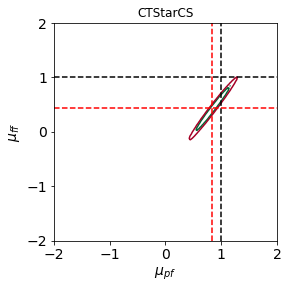

In [50]:
def fit(var = 'tp_mass',
        bins_ = np.linspace(0,1000,25), L=35.9 ) :
    hd, xd = np.histogram(data_region[(data_region.Y == 2)][var],
                          weights=data_region[(data_region.Y == 2)].weight,
                          bins=bins_)
    h_pf, xd = np.histogram(dd_PF[var], weights=dd_PF.weight * L, bins=bins_)
    h_fp, xd = np.histogram(dd_FP[var], weights=dd_FP.weight * L, bins=bins_)
    h_ff, xd = np.histogram(dd_FF[var], weights=dd_FF.weight * L, bins=bins_)
    
    pp, xd = np.histogram(data_SMMC[(data_SMMC['sample'] == 'dipho')][var],
                          weights=data_SMMC[(data_SMMC['sample'] == 'dipho')].weight * L,
                          bins=bins_)
    def residual(a,b):
        return divide(((pp + a*(h_pf + h_fp) + b*h_ff) - hd),np.sqrt(hd))**2
    def chi2(a,b):
        return  np.sum(divide(((pp + a*(h_pf + h_fp) + b*h_ff) - hd),
                              np.sqrt(np.abs(hd + (pp + a*(h_pf + h_fp) + b*h_ff))))**2 )
    chi2 = np.vectorize(chi2)
    def func_(x):
        return  np.sum(divide(hd - pp - x[0]*(h_pf + h_fp)- x[1]*h_ff,np.sqrt(hd))**2)/hd.shape[0]
    
    a = np.linspace(-2,2,101)
    b = np.linspace(-2,2,101)
    
    v_, w_ = np.meshgrid(a,b)
    
    x0 = np.array([1,1])
    res = minimize(func_, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
    
    plt.figure(figsize=(4,4))
    plt.title(var)
    z_ = chi2(v_,w_)
    plt.contour(v_,w_, z_, np.linspace(np.min(z_), 2*np.min(z_), 3), cmap=plt.cm.RdYlGn_r)
    plt.xlabel("$\mu_{pf}$")
    plt.ylabel("$\mu_{ff}$")
    
    plt.axvline(1,ls='--',color='k')
    plt.axhline(1,ls='--',color='k')
    
    plt.axvline(res.x[0],ls='--',color='r')
    plt.axhline(res.x[1],ls='--',color='r')
    print res.x
    return  res.x
    
    
norm = fit(var = 'CTStarCS'       , bins_ = np.linspace(0, 1,21), L=35.9)

print norm

In [51]:
dd_PF.weight = dd_PF.weight * norm[0]
dd_FP.weight = dd_FP.weight * norm[0]
dd_FF.weight = dd_FF.weight * norm[1]

data_driven = pd.concat([dd_PF, dd_FP, dd_FF])
# data_driven = pd.concat([dd_PF, dd_FF])

In [52]:
from matplotlib import gridspec

def varibale_data_driven(var = 'tp_mass',var_label='$m_{jj}$ (GeV)', label='',
                         bins_ = np.linspace(0,1000,25),blind=False, title='H4G preselection',
                         mu=0.9, log = True, normed = False, L=35.9, xlog = False) :
    plt.figure(figsize=(6,9))
    gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1])
    #     ax1 = plt.subplot2grid((4,1), (0,0),rowspan=2)
    ax1 = plt.subplot(gs[0])
    
    hd, xd = np.histogram(data_region[(data_region.Y == 2)][var], normed=normed,
                          weights=data_region[(data_region.Y == 2)].weight,
                          bins=bins_)
    
    dd, xd = np.histogram(data_driven[(data_driven.Y == 2)][var], normed=normed,
                          weights=data_driven[(data_driven.Y == 2)].weight * L,
                          bins=bins_)
    gg, xd = np.histogram(data_SMMC[(data_SMMC['sample'] == 'dipho')][var], normed=normed,
                          weights=data_SMMC[(data_SMMC['sample'] == 'dipho')].weight * L,
                          bins=bins_)
    
    mc, xd = np.histogram(data_SMMC[(data_SMMC['sample'] != 'h4g')][var], normed=normed,
                          weights=data_SMMC[(data_SMMC['sample'] != 'h4g')].weight * L,
                          bins=bins_)
    
    ggh, xd = np.histogram(data_SMMC[(data_SMMC['sample'] == 'h4g_60_sig')][var], normed=normed,
                           weights=data_SMMC[(data_SMMC['sample'] == 'h4g_60_sig')].weight * L * 10,
                           bins=bins_)

    mc, xd = np.histogram(data_signal[(data_signal['sample'] == 'h4g')][var], normed=normed,
                           weights=data_signal[(data_signal['sample'] == 'h4g')].weight * L ,
                           bins=bins_)

    ddw, xd = np.histogram(data_driven[(data_driven.Y == 2)][var], normed=normed,
                          weights=(data_driven[(data_driven.Y == 2)].weight)**2,
                          bins=bins_)
    
    mcw, xd = np.histogram(data_SMMC[(data_SMMC['sample'] != 'h4g')][var], normed=normed,
                          weights=(data_SMMC[(data_SMMC['sample'] != 'h4g')].weight * L)**2,
                          bins=bins_)

    ggw, xd = np.histogram(data_SMMC[(data_SMMC['sample'] == 'dipho')][var], normed=normed,
                          weights=(data_SMMC[(data_SMMC['sample'] == 'dipho')].weight * L)**2,
                          bins=bins_)

    
    xd = np.array([(bins_[i+1]+ bins_[i])/2.0 for i in range(len(bins_)-1)])
    xe = np.array([(bins_[i+1]- bins_[i])/2.0 for i in range(len(bins_)-1)])
    
    ax1.annotate(title, xy=(1, 1.008), xycoords='axes fraction', fontsize=12,
                 horizontalalignment='right', verticalalignment='bottom')
    if blind:
        ax1.errorbar(xd[abs(xd-125)>10], hd[abs(xd-125)>10], xerr=xe[abs(xd-125)>10], 
                     yerr=np.sqrt(hd[abs(xd-125)>10]), fmt='.', c='black', 
                     markersize=11,capthick=0,
                     alpha=1.0, label='data')
    else:
        ax1.errorbar(xd, hd, xerr=xe, 
                     yerr=np.sqrt(hd), fmt='.', c='black', 
                     markersize=11,capthick=0,
                     alpha=1.0, label='data')
    plt.hist([data_SMMC[(data_SMMC['sample'] == 'dipho')][var], data_driven[var]], 
             normed=normed,
             weights=[
                 data_SMMC[(data_SMMC['sample'] == 'dipho')].weight * L,
                 data_driven.weight * L
             ],
             lw=1.2,bins=bins_, histtype='stepfilled', stacked=True,
             color=['#70C1B3','#C5D2DB'],label=['$\gamma\gamma$ (Sherpa)','$\gamma$j + jj (data-driven)'])
    
    ax1.errorbar(xd, (dd + gg),xerr=xe, fmt='.', c='green', 
                 markersize=1,capthick=0,
                 alpha=1.0)
    ax1.errorbar(xd, mc,xerr=xe, fmt='.', c='blue', 
                 markersize=1,capthick=0,
                 alpha=1.0, label='MC')
    ax1.step(xd, mc, where='mid',color='blue')
    
    ax1.errorbar(xd, ggh,xerr=xe, fmt='.', c='#F9AD0B', 
                 markersize=1,capthick=0,
                 alpha=1.0, label='ggH $\\times 10$')
    ax1.step(xd, ggh, where='mid',color='#F9AD0B')
    
    ax1.errorbar(xd, ggh,xerr=xe, fmt='.', c='red', 
                 markersize=1,capthick=0,
                 alpha=1.0, label='VBF $\\times 10^2$')
    ax1.step(xd, mc, where='mid',color='red')
    ax1.bar(xd,2*np.sqrt(ddw + ggw),
            bottom = (dd + gg)-np.sqrt(ddw + ggw),width= 2*xe, 
            color='red',alpha=0.3, zorder=12, 
            align='center',edgecolor='None',lw=0.0,
            label='stat')
    
    ax1.set_xlim([min(bins_), max(bins_)])
    
    if log : 
        ax1.set_ylim([0.1,1000*max([hd.max(),dd.max()])])
        ax1.set_yscale('log')
    else:
        ax1.set_ylim([0.1,1.8*max([hd.max(),dd.max()])])
    ax1.set_ylabel('events' ,ha='right')
   
    
    ax1.legend(fontsize=12, ncol=2)
    
    ax2 = plt.subplot(gs[1], sharex = ax1)
    ax2 = plt.subplot2grid((4,1), (2,0),sharex=ax1)
    
    r_dd = divide(dd + gg, hd)
    r_mc = divide(mc,hd)
    
    # Now the error propagation is for this ratio R=MC/Data is
    # (dR/R)^2 = (da/a)^2 + (db/b)^2
    # If db = 0 --> then (dR/R)^2 = (da/a)^2 --> dR = R (da/a)
    # 
   
    r_dd_err_mc =  r_dd * divide(np.sqrt(ddw + ggw), dd + gg)
    r_mc_err_mc =  r_mc * divide(np.sqrt(mcw), mc)
    
    r_dd_err =  r_dd*divide(np.sqrt(hd), dd + gg)
    r_mc_err =  r_mc*divide(np.sqrt(hd), mc)
    if blind:
        ax2.errorbar(xd[abs(xd-125)>10],r_dd[abs(xd-125)>10],xerr=xe[abs(xd-125)>10], 
                     yerr = r_mc_err[abs(xd-125)>10],
                     fmt='.', c='black', 
                     markersize=11,capthick=0,
                     alpha=1.0)
        ax2.axhline(y=1,color='Black',ls='--',lw=0.5)
        ax2.bar(xd,2*r_dd_err_mc,
            bottom = 1.0-r_dd_err_mc,width= 2*xe, 
            color='r',alpha=0.3, zorder=0, align='center',edgecolor='None',lw=0.0,
            label='stat')
        ax2.set_ylim([0,2])
    else:
        ax2.errorbar(xd,r_dd,xerr=xe, 
                     yerr = r_mc_err,
                     fmt='.', c='black', 
                     markersize=11,capthick=0,
                     alpha=1.0)
        ax2.axhline(y=1,color='Black',ls='--',lw=0.5)
        ax2.bar(xd,2*r_dd_err_mc,
            bottom = 1.0-r_dd_err_mc,width= 2*xe, 
            color='r',alpha=0.3, zorder=0, align='center',edgecolor='None',lw=0.0,
            label='stat')
        ax2.set_ylim([0,2])
    ax2.set_ylabel('$(MC + DD)/Data$')
    plt.setp(ax1.get_xticklabels(), visible=False)
    yticks = ax1.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    
    ax3 = plt.subplot(gs[2], sharex = ax1)
    if blind:
        ax3.errorbar(xd[abs(xd-125)>10], r_mc[abs(xd-125)>10] ,
                     xerr=xe[abs(xd-125)>10], 
                     yerr = r_mc_err[abs(xd-125)>10],
                     fmt='.', c='blue', 
                     markersize=11,capthick=0,
                     alpha=1.0)
        ax3.axhline(y=1,color='Black',ls='--',lw=0.5)
        ax3.bar(xd[abs(xd-125)>10],2*r_mc_err_mc[abs(xd-125)>10],
                bottom = 1.0 - r_mc_err_mc[abs(xd-125)>10],
                width= 2*xe[abs(xd-125)>10], 
                color='b',alpha=0.3, zorder=9, align='center',edgecolor='None',lw=0.0,
                label='stat')
        ax3.set_ylim([0,2])
        ax3.set_xlabel(var_label)
    else:
        ax3.errorbar(xd, r_mc ,xerr=xe, 
                     yerr = r_mc_err,
                     fmt='.', c='blue', 
                     markersize=11,capthick=0,
                     alpha=1.0)
        ax3.axhline(y=1,color='Black',ls='--',lw=0.5)
        ax3.bar(xd,2*r_mc_err_mc,
                bottom = 1.0 - r_mc_err_mc,width= 2*xe, 
                color='b',alpha=0.3, zorder=9, align='center',edgecolor='None',lw=0.0,
                label='stat')
        ax3.set_ylim([0,2])
        ax3.set_xlabel(var_label)
    ax3.set_xlim([bins_.min(), bins_.max()])
    ax3.set_ylabel('MC/Data')
    if xlog  : ax3.set_xscale('log')
    
    plt.setp(ax2.get_xticklabels(), visible=False)
    # remove last tick label for the second subplot
    yticks = ax3.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    plt.subplots_adjust(hspace=.0)
    
    plt.savefig('data-driven-xcheck-%s-%s.pdf'% (label, var))
    plt.savefig('data-driven-xcheck-%s-%s.png'% (label, var))

In [53]:
# version = 'double-fake-0720-cut-0.9'
version = 'double-fake-0924'

/usr/local/bin/start_ipykernel.py:13: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:17: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:20: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:24: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:28: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:32: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:36: De

[65.06790287 53.57995225 65.84793196 61.66439527 54.73590968 50.64985873
 57.38579101 62.55901744 64.41401518 61.71343861 86.52400206 80.58393961
 68.75539489 85.54567651 70.5437027  69.35950429 78.29583593 60.98994468
 51.38319427 72.78774431 74.08806603 64.32648933 67.94322675 47.70269308
 70.3610483  58.37362855 51.9643129  63.86484761 67.96098283 51.46929959
 55.23239401 43.32970921 37.48708647 48.74916877 31.2574149  50.04311481
 38.77127375 56.05552614 28.50212221 40.27373433] [65. 65. 70. 80. 74. 80. 62. 82. 49. 69. 64. 81. 69. 57. 72. 70. 62. 57.
 59. 60. 65. 88. 53. 46. 54. 66. 55. 60. 52. 49. 56. 41. 48. 57. 49. 43.
 43. 36. 50. 47.] [1.00104466 0.82430696 0.94068474 0.77080494 0.73967446 0.63312323
 0.92557727 0.76291485 1.31457174 0.89439766 1.35193753 0.99486345
 0.996455   1.50080134 0.97977365 0.99085006 1.26283606 1.06999903
 0.8709016  1.21312907 1.1398164  0.73098283 1.28194767 1.03701507
 1.30298238 0.88444892 0.94480569 1.06441413 1.30694198 1.05039387
 0.98629275 1

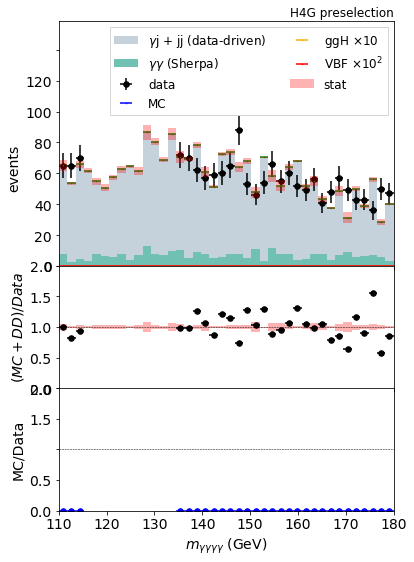

In [54]:
varibale_data_driven(var = 'tp_mass',var_label='$m_{\gamma\gamma\gamma\gamma}$ (GeV)', 
                     bins_ = np.linspace(110,180,41),log=False, blind=True,
                     label=version, L=35.9, mu=1.0)

/usr/local/bin/start_ipykernel.py:13: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:17: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:20: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:24: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:28: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:32: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/usr/local/bin/start_ipykernel.py:36: De

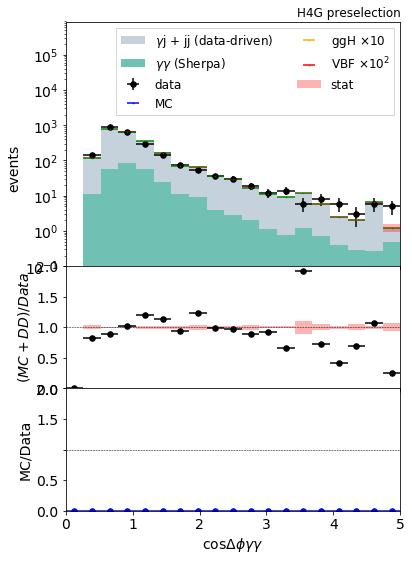

In [695]:
varibale_data_driven(var = 'a1_Pho1PtOvera1Mass',
                     var_label='$\cos\Delta\phi{\gamma\gamma}$', 
                     bins_ = np.linspace(0,5,20),log=True, mu=5.0,label=version)
# varibale_data_driven(var = 'dijet_dipho_dphi_trunc',
#                      var_label='$\Delta\phi{jj,\gamma\gamma}$', 
#                      bins_ = np.linspace(0,3,16),log=False, mu=1.0,label=version)

KeyError: 'dijet_Mjj'

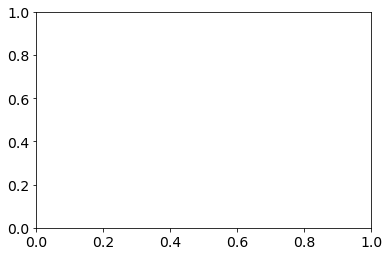

In [408]:
varibale_data_driven(var = 'dijet_Mjj',
                     var_label='$m_{jj}$', 
                     bins_ = np.linspace(250,1000,31),log=False, mu=1.0,label=version)
varibale_data_driven(var = 'dijet_LeadJPt',
                     var_label='lead $p_{T}$', 
                     bins_ = np.linspace(40,440,11),log=False, mu=1.0,label=version)
varibale_data_driven(var = 'dijet_SubJPt',
                     var_label='sub-lead $p_{T}$', 
                     bins_ = np.linspace(30,430,11),log=False, mu=1.0,label=version)

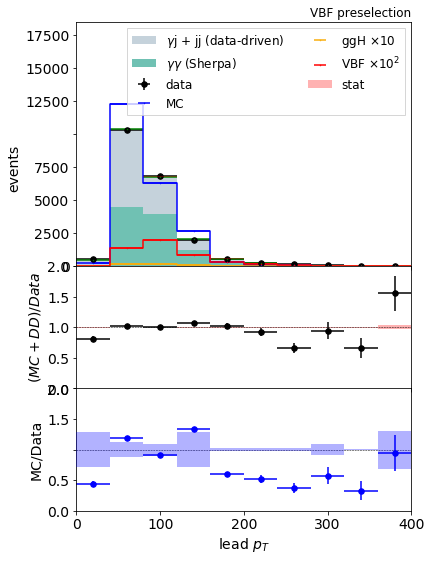

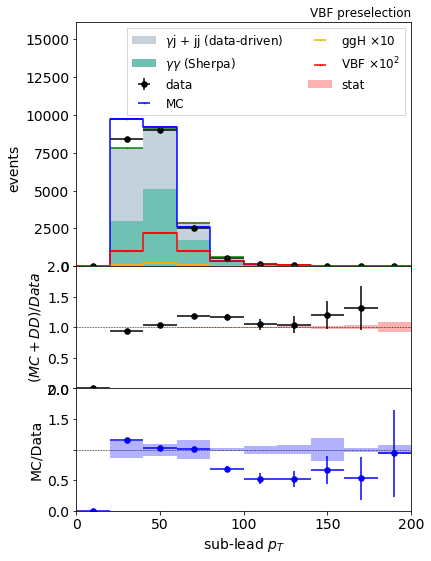

In [42]:
varibale_data_driven(var = 'dipho_leadPt',
                     var_label='lead $p_{T}$', 
                     bins_ = np.linspace(0,400,11),log=False, mu=1.0,label=version)
varibale_data_driven(var = 'dipho_subleadPt',
                     var_label='sub-lead $p_{T}$', 
                     bins_ = np.linspace(0,200,11),log=False, mu=1.0,label=version)

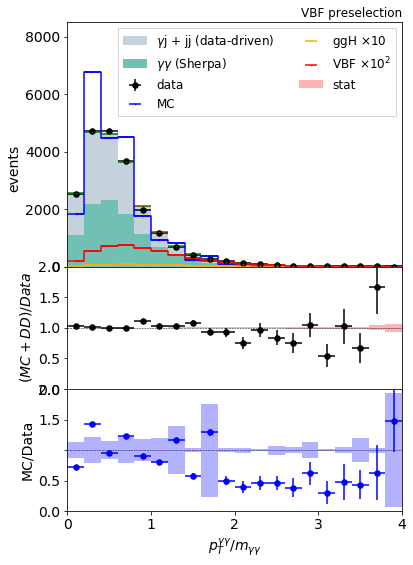

In [43]:
varibale_data_driven(var = 'dipho_PToM',
                     var_label='$p_{T}^{\gamma\gamma}/m_{\gamma\gamma}$', 
                     bins_ = np.linspace(0,4,21),log=False, mu=1.0,label=version)

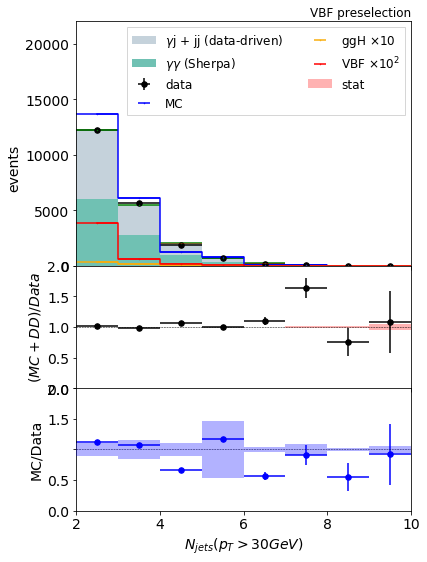

In [44]:
varibale_data_driven(var = 'n_jet_30',
                     var_label='$N_{jets} (p_{T}>30 GeV)$', 
                     bins_ = np.linspace(2,10,9),log=False, mu=1.0,label=version)

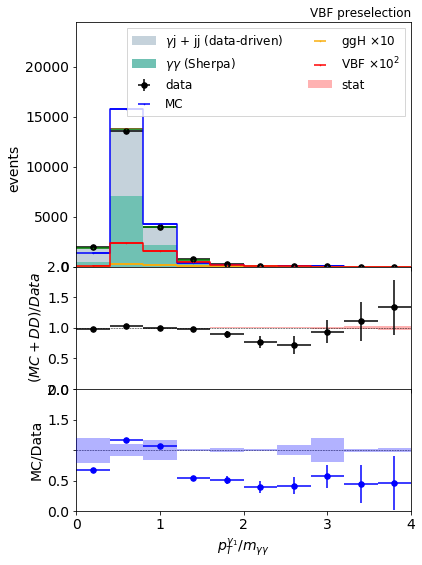

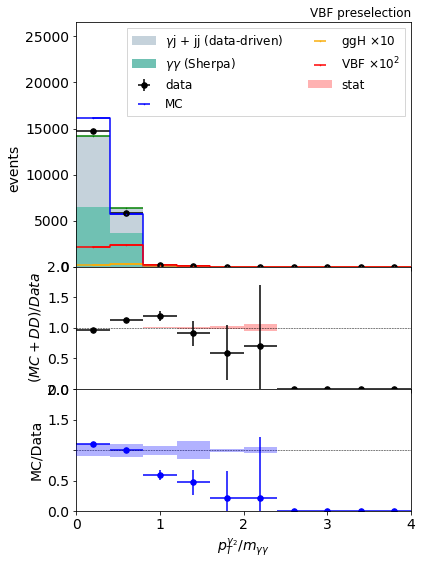

In [45]:
varibale_data_driven(var = 'leadPho_PToM',
                     var_label='$p_{T}^{\gamma_1}/m_{\gamma\gamma}$', 
                     bins_ = np.linspace(0,4,11),log=False, mu=1.0,label=version)
varibale_data_driven(var = 'sublPho_PToM',
                     var_label='$p_{T}^{\gamma_2}/m_{\gamma\gamma}$', 
                     bins_ = np.linspace(0,4,11),log=False, mu=1.0,label=version)

## Save dataset

In [46]:
data_driven['sample'] = 'QCD'

In [47]:
data_driven.Y = 0
data_out = pd.concat([data_driven, data_region, data_SMMC, data_signal])
np.unique(data_out['sample'])

array(['QCD', 'data', 'dipho', 'ggh', 'gjet', 'qcd', 'vbf', 'zee'], dtype=object)

In [49]:
data_out.to_hdf('hgg-double-fake-trees-training-2017-shameena.h5'   , 'results_table', mode='w', format='table')